In [5]:
pip install MDAnalysis

Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install biopython

Note: you may need to restart the kernel to use updated packages.


In [ ]:
import MDAnalysis as mda
from MDAnalysis.analysis import align
import numpy as np
import matplotlib.pyplot as plt

# Load your system (edit these paths)
u = mda.Universe("npt.tpr", "md_0_2.xtc")

# Function to parse the .ndx file and get atom indices
def parse_ndx(filename, group_name):
    indices = []
    with open(filename, 'r') as f:
        in_group = False
        for line in f:
            if line.strip().startswith('['):
                in_group = (group_name in line)
                continue
            if in_group and line.strip().isdigit():
                indices.append(int(line.strip()) - 1)  # GROMACS indices are 1-based, so subtract 1
    return indices

# Get atom indices from the index file
cxcr4_indices = parse_ndx("custom_calpha.ndx", "CXCR4_C_alpha")
cxcl12_indices = parse_ndx("custom_calpha.ndx", "CXCL12_C_alpha")

# Select atoms using the parsed indices
ref_atoms = u.atoms[cxcr4_indices]
rmsd_atoms = u.atoms[cxcl12_indices]

# Print number of atoms selected in each group
print("Number of reference atoms (CXCR4 CA):", ref_atoms.n_atoms)
print("Number of RMSD atoms (CXCL12 CA):", rmsd_atoms.n_atoms)

# Create a reference structure (align based on CXCR4 Cα)
ref = u.copy()
ref.trajectory[0]
aligner = align.AlignTraj(u, ref, select="index " + " ".join(map(str, cxcr4_indices)), in_memory=True).run()

# Store reference coordinates of the peptide
ref_pos = rmsd_atoms.positions.copy()
n_atoms = len(rmsd_atoms)


/opt/homebrew/anaconda3/lib/python3.11/site-packages/Bio/Application/__init__.py:39: BiopythonDeprecationWarning: The Bio.Application modules and modules relying on it have been deprecated.

Due to the on going maintenance burden of keeping command line application
wrappers up to date, we have decided to deprecate and eventually remove these
modules.

We instead now recommend building your command line and invoking it directly
with the subprocess module.
  warnings.warn(


Number of reference atoms (CXCR4 CA): 296
Number of RMSD atoms (CXCL12 CA): 62


In [ ]:
# RMSD calculation
rmsd_values = []
times = []

for ts in u.trajectory:
    current_peptide_pos = peptide.positions
    rmsd = np.sqrt(np.mean((current_peptide_pos - ref_peptide_pos) ** 2))
    rmsd_values.append(rmsd)
    times.append(ts.time)

# Plotting
plt.figure(figsize=(8, 4))
plt.plot(times, rmsd_values, label='CXCL12 RMSD (w.r.t. CXCR4)')
plt.xlabel("Time (ps)")
plt.ylabel("RMSD (Å)")
plt.title("Peptide Stability (CXCL12 w.r.t. CXCR4)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
#Start

In [285]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
import matplotlib as mpl
from matplotlib.ticker import MultipleLocator
from matplotlib.ticker import FormatStrFormatter
from matplotlib.lines import Line2D
import seaborn as sns
import csv
import pandas as pd
import scipy.stats as stats
import MDAnalysis as mda

In [319]:
# 3-letter to 1-letter residue code dictionary
dictionary = {"GLY": "G", "ALA": "A", "LEU": "L", "MET": "M", "PHE": "F", "TRP": "W",
              "LYS": "K", "GLN": "Q", "GLU": "E", "SER": "S", "PRO": "P", "VAL": "V",
              "ILE": "I", "CYS": "C", "TYR": "Y", "HIS": "H", "HSD": "H", "ARG": "R",
              "ASN": "N", "ASP": "D", "THR": "T"}
loc = '/Users/farahzainab/Documents/'
# Load topology
u = mda.Universe("npt.tpr")

# Select Cα atoms of CXCR4 and CXCL12 based on chain IDs
protein = u.select_atoms("segid seg_0_Protein_chain_A and name CA")
peptide = u.select_atoms("segid seg_1_Protein_chain_D and name CA")

# Helper function to build labels
def build_labels(group):
    labels = []
    for atom in group:
        resname = atom.resname
        resid = atom.resid
        one_letter = dictionary.get(resname, "X")  # fallback to 'X' if not found
        label = f"{one_letter}{resid}"
        labels.append(label)
    return labels

label_protein = build_labels(protein)
label_peptide = build_labels(peptide)

print("CXCR4 Labels (Protein):", label_protein)
print("CXCL12 Labels (Peptide):", label_peptide)


CXCR4 Labels (Protein): ['K2', 'E3', 'P4', 'C5', 'F6', 'R7', 'E8', 'E9', 'N10', 'A11', 'N12', 'F13', 'N14', 'K15', 'I16', 'F17', 'L18', 'P19', 'T20', 'I21', 'Y22', 'S23', 'I24', 'I25', 'F26', 'L27', 'T28', 'G29', 'I30', 'V31', 'G32', 'N33', 'G34', 'L35', 'V36', 'I37', 'L38', 'V39', 'M40', 'G41', 'Y42', 'Q43', 'K44', 'K45', 'L46', 'R47', 'S48', 'M49', 'T50', 'D51', 'K52', 'Y53', 'R54', 'L55', 'H56', 'L57', 'S58', 'V59', 'A60', 'D61', 'L62', 'L63', 'F64', 'V65', 'I66', 'T67', 'L68', 'P69', 'F70', 'W71', 'A72', 'V73', 'D74', 'A75', 'V76', 'A77', 'N78', 'W79', 'Y80', 'F81', 'G82', 'N83', 'F84', 'L85', 'C86', 'K87', 'A88', 'V89', 'H90', 'V91', 'I92', 'Y93', 'T94', 'V95', 'N96', 'L97', 'Y98', 'S99', 'S100', 'V101', 'L102', 'I103', 'L104', 'A105', 'F106', 'I107', 'S108', 'L109', 'D110', 'R111', 'Y112', 'L113', 'A114', 'I115', 'V116', 'H117', 'A118', 'T119', 'N120', 'S121', 'Q122', 'R123', 'P124', 'R125', 'K126', 'L127', 'L128', 'A129', 'E130', 'K131', 'V132', 'V133', 'Y134', 'V135', 'G136', '

/opt/homebrew/anaconda3/lib/python3.11/site-packages/MDAnalysis/core/universe.py:150: UserWarning: No coordinate reader found for npt.tpr. Skipping this file.
  warnings.warn('No coordinate reader found for {}. Skipping '


In [327]:
#Lables for protein and peptides (P1-P2)
import MDAnalysis as mda

# 3-letter to 1-letter amino acid code dictionary
residue_dict = {
    "GLY": "G", "ALA": "A", "LEU": "L", "MET": "M", "PHE": "F", "TRP": "W",
    "LYS": "K", "GLN": "Q", "GLU": "E", "SER": "S", "PRO": "P", "VAL": "V",
    "ILE": "I", "CYS": "C", "TYR": "Y", "HIS": "H", "HSD": "H", "ARG": "R",
    "ASN": "N", "ASP": "D", "THR": "T"
}

# Define file paths
file_path_cxcr4 = "/Users/farahzainab/Documents/CXCR4-CXCL12(1500ns)/cxcr4-capped.pdb"
file_path_cxcl12 = "/Users/farahzainab/Documents/CXCR4-CXCL12(1500ns)/c4-c12-capped.pdb"
file_path_entf = "/Users/farahzainab/Documents/CXCR4-EntF-run1/c4-entf-capped.pdb"

# Load the systems
u_cxcr4 = mda.Universe(file_path_cxcr4)
u_cxcl12 = mda.Universe(file_path_cxcl12)
u_entf = mda.Universe(file_path_entf)

# Function to build labels
def build_labels(group):
    labels = []
    for atom in group:
        resname = atom.resname
        resid = atom.resid
        one_letter = residue_dict.get(resname, "X")  # fallback to 'X'
        label = f"{one_letter}{resid}"
        labels.append(label)
    return labels

# Select atoms and build labels
protein_cxcr4 = u_cxcr4.select_atoms("chainid A and name CA")
peptide_cxcl12 = u_cxcl12.select_atoms("chainid D and name CA")
peptide_entf = u_entf.select_atoms("chainid B and name CA")

label_protein = build_labels(protein_cxcr4)
label_peptide_cxcl12 = build_labels(peptide_cxcl12)
label_peptide_entf = build_labels(peptide_entf)

# Output
print("CXCR4 labels:", label_protein[:10])
print("CXCL12 peptide labels:", label_peptide_cxcl12[:10])
print("ENTF peptide labels:", label_peptide_entf[:10])


CXCR4 labels: ['K25', 'E26', 'P27', 'C28', 'F29', 'R30', 'E31', 'E32', 'N33', 'A34']
CXCL12 peptide labels: ['K1', 'P2', 'V3', 'S4', 'L5', 'S6', 'Y7', 'R8', 'C9', 'P10']
ENTF peptide labels: ['S1', 'N2', 'L3', 'V4', 'E5', 'C6', 'V7', 'F8', 'S9', 'L10']


In [ ]:
#2 (CXCR4-CXCL12) 2nd RMSF no jumps

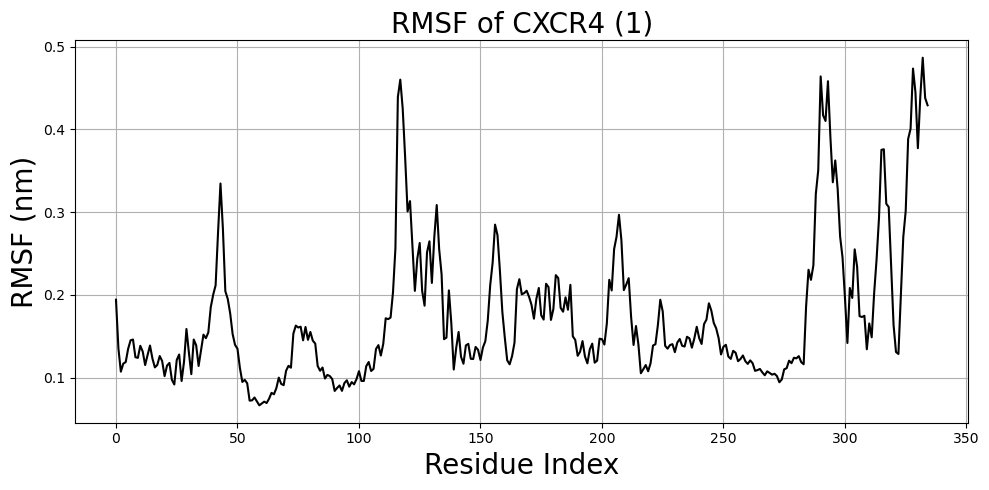

In [422]:
import numpy as np
import matplotlib.pyplot as plt

# === Path to your single RMSF XVG file ===
xvg_path = "/Users/farahzainab/Documents/CXCR4-CXCL12-run2/rmsf_cxcr42.xvg"

# === Load data (ignore comments in XVG) ===
data = np.loadtxt(xvg_path, comments=["@", "#"])
residue_indices = np.arange(len(data[:, 0]))  # X-axis as residue index
rmsf = data[:, 1]  # Y-axis is RMSF in nm

# === Plot RMSF ===
plt.figure(figsize=(10, 5))
plt.plot(residue_indices, rmsf, color="XKCD:black")
plt.xlabel("Residue Index", fontsize=20)
plt.ylabel("RMSF (nm)", fontsize=20)
plt.title("RMSF of CXCR4 (1)", fontsize=20)
plt.grid(True)
plt.tight_layout()
plt.savefig("2c4alone-c12_RMSF.png", dpi=300)
plt.show()


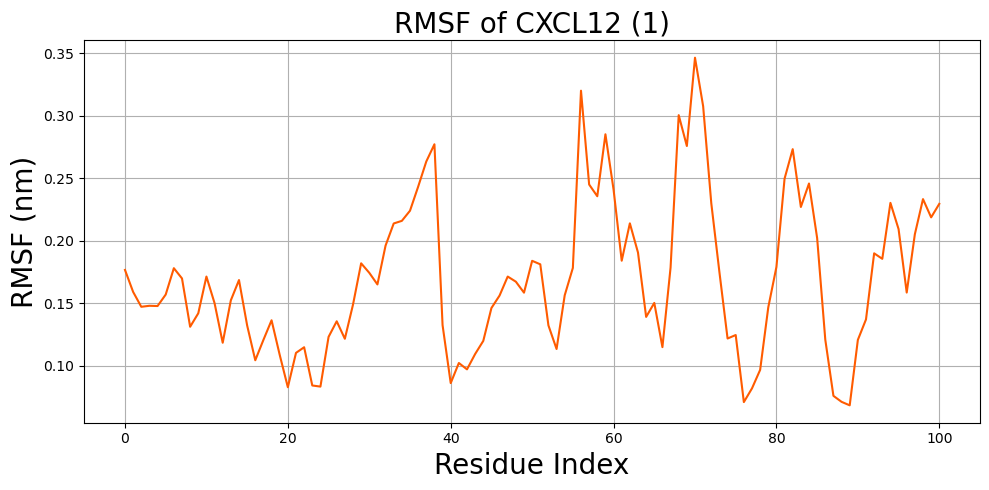

In [423]:
xvg_path = "/Users/farahzainab/Documents/CXCR4-CXCL12-run2/rmsf_cxcl122.xvg"

# === Load data (ignore comments in XVG) ===
data = np.loadtxt(xvg_path, comments=["@", "#"])
residue_indices = np.arange(len(data[:, 0]))  # X-axis as residue index
rmsf = data[:, 1]  # Y-axis is RMSF in nm

# === Plot RMSF ===
plt.figure(figsize=(10, 5))
plt.plot(residue_indices, rmsf, color="XKCD:bright orange")
plt.xlabel("Residue Index", fontsize=20)
plt.ylabel("RMSF (nm)", fontsize=20)
plt.title("RMSF of CXCL12 (1)", fontsize=20)
plt.grid(True)
plt.tight_layout()
plt.savefig("2c4-c12alone_RMSF.png", dpi=300)
plt.show()

In [ ]:
#2 (CXCR4-CXCL12) 2nd RMSD no jumps

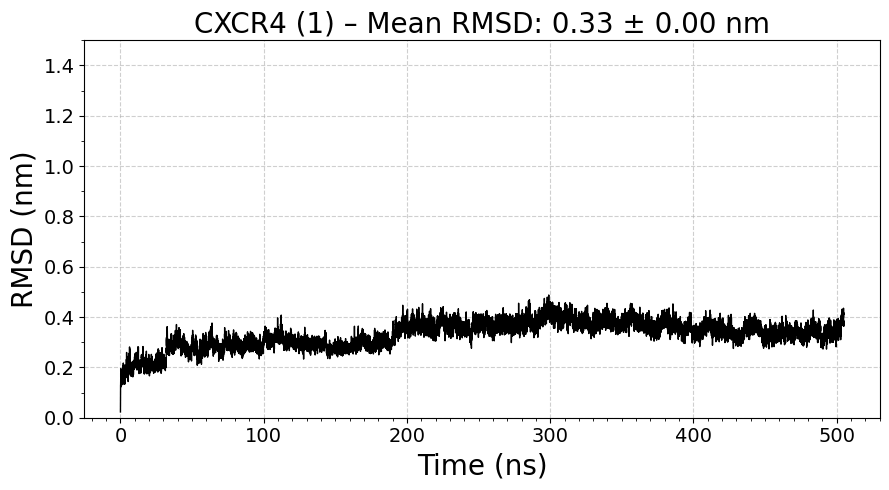

20201


In [426]:
#CXCR4-TRY
xvg_path = "/Users/farahzainab/Documents/CXCR4-CXCL12-run2/rmsd_cxcr42.xvg"
label = "CXCR4 (1)"
color = "XKCD:black"  # or "XKCD:bright orange"
ylim = (0, 1.5)

# === Load XVG data ===
data = np.loadtxt(xvg_path, comments=["@", "#"])
time = data[:, 0] / 1000  # convert ps to ns
rmsd = data[:, 1]
hi = len(rmsd)

# === Compute stats ===
mean_rmsd = np.mean(rmsd)
sem_rmsd = np.std(rmsd) / np.sqrt(len(rmsd))

# === Plot ===
fig, ax = plt.subplots(figsize=(9, 5))
ax.plot(time, rmsd, color=color, label=label, linewidth=1)
#ax.fill_between(time, rmsd - sem_rmsd, rmsd + sem_rmsd, alpha=0.3, color=color)

ax.set_xlabel("Time (ns)", fontsize=20)
ax.set_ylabel("RMSD (nm)", fontsize=20)
ax.set_title(f"{label} – Mean RMSD: {mean_rmsd:.2f} ± {sem_rmsd:.2f} nm", fontsize=20)

ax.set_ylim(ylim)

# Ticks and grid
ax.tick_params(axis='both', which='major', labelsize=14)
ax.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
ax.xaxis.set_major_formatter(FormatStrFormatter('%.0f'))
ax.xaxis.set_minor_locator(MultipleLocator(10))
ax.yaxis.set_minor_locator(MultipleLocator(0.1))
ax.grid(True, which='major', linestyle='--', alpha=0.6)

# Legend
#custom_line = [Line2D([0], [0], color=color, lw=2)]
#ax.legend(custom_line, [label], fontsize=14, loc='upper right')

plt.tight_layout()
plt.savefig("2c4alone-c12_RMSD.png", dpi=300)
plt.show()
print(hi)

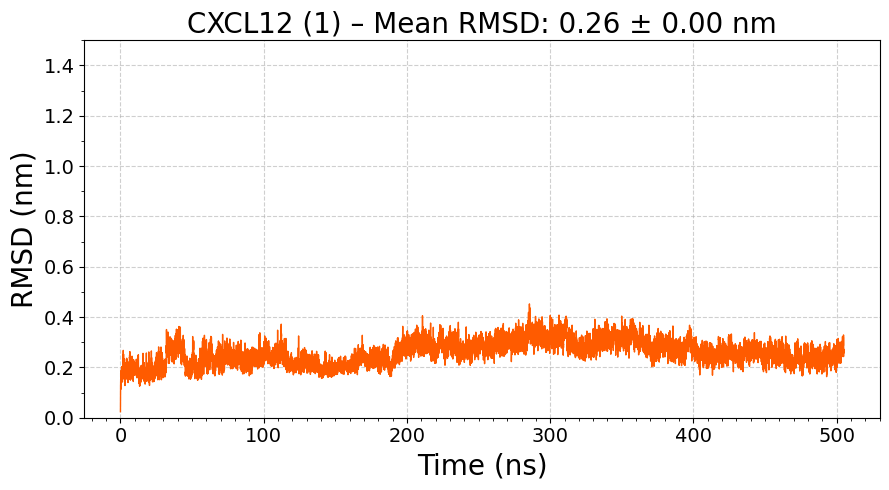

20201


In [428]:
# === EDIT this to match your file path ===
xvg_path = "/Users/farahzainab/Documents/CXCR4-CXCL12-run2/rmsd_cxcl122.xvg"
label = "CXCL12 (1)"
color = "XKCD:bright orange"
ylim = (0, 1.5)

# === Load XVG data ===
data = np.loadtxt(xvg_path, comments=["@", "#"])
time = data[:, 0] / 1000  # convert ps to ns
rmsd = data[:, 1]
hi = len(rmsd)

# === Compute stats ===
mean_rmsd = np.mean(rmsd)
sem_rmsd = np.std(rmsd) / np.sqrt(len(rmsd))

# === Plot ===
fig, ax = plt.subplots(figsize=(9, 5))
ax.plot(time, rmsd, color=color, label=label, linewidth=1)
#ax.fill_between(time, rmsd - sem_rmsd, rmsd + sem_rmsd, alpha=0.3, color=color)

ax.set_xlabel("Time (ns)", fontsize=20)
ax.set_ylabel("RMSD (nm)", fontsize=20)
ax.set_title(f"{label} – Mean RMSD: {mean_rmsd:.2f} ± {sem_rmsd:.2f} nm", fontsize=20)

ax.set_ylim(ylim)

# Ticks and grid
ax.tick_params(axis='both', which='major', labelsize=14)
ax.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
ax.xaxis.set_major_formatter(FormatStrFormatter('%.0f'))
ax.xaxis.set_minor_locator(MultipleLocator(10))
ax.yaxis.set_minor_locator(MultipleLocator(0.1))
ax.grid(True, which='major', linestyle='--', alpha=0.6)

# Legend
#custom_line = [Line2D([0], [0], color=color, lw=2)]
#ax.legend(custom_line, [label], fontsize=14, loc='upper right')

plt.tight_layout()
plt.savefig("2c4-c12alone_RMSD.png", dpi=300)
plt.show()
print(hi)

In [ ]:
#3 (CXCR4-CXCL12) 3rd RMSF no jumps

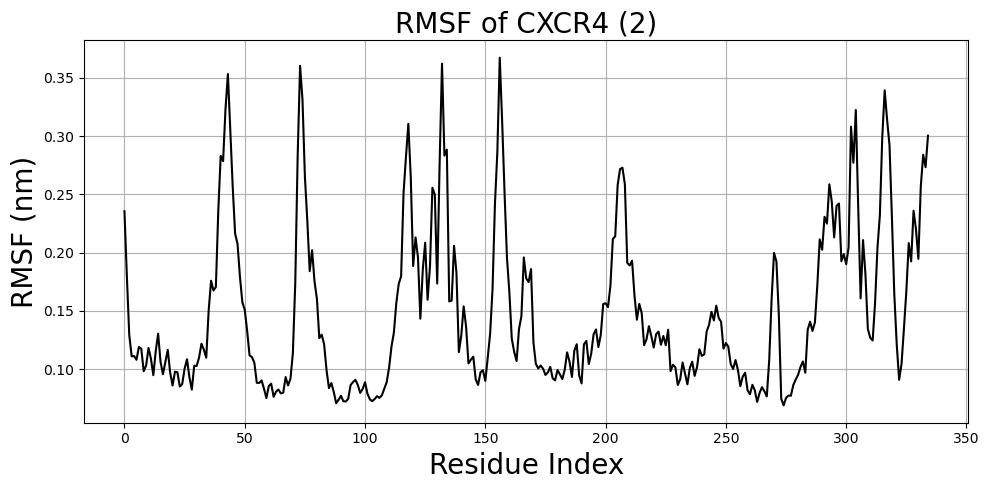

In [429]:
import numpy as np
import matplotlib.pyplot as plt

# === Path to your single RMSF XVG file ===
xvg_path = "/Users/farahzainab/Documents/CXCR4-CXCL12-run3/rmsf_cxcr43.xvg"

# === Load data (ignore comments in XVG) ===
data = np.loadtxt(xvg_path, comments=["@", "#"])
residue_indices = np.arange(len(data[:, 0]))  # X-axis as residue index
rmsf = data[:, 1]  # Y-axis is RMSF in nm

# === Plot RMSF ===
plt.figure(figsize=(10, 5))
plt.plot(residue_indices, rmsf, color="XKCD:black")
plt.xlabel("Residue Index", fontsize=20)
plt.ylabel("RMSF (nm)", fontsize=20)
plt.title("RMSF of CXCR4 (2)", fontsize=20)
plt.grid(True)
plt.tight_layout()
plt.savefig("3c4alone-c12_RMSF.png", dpi=300)
plt.show()


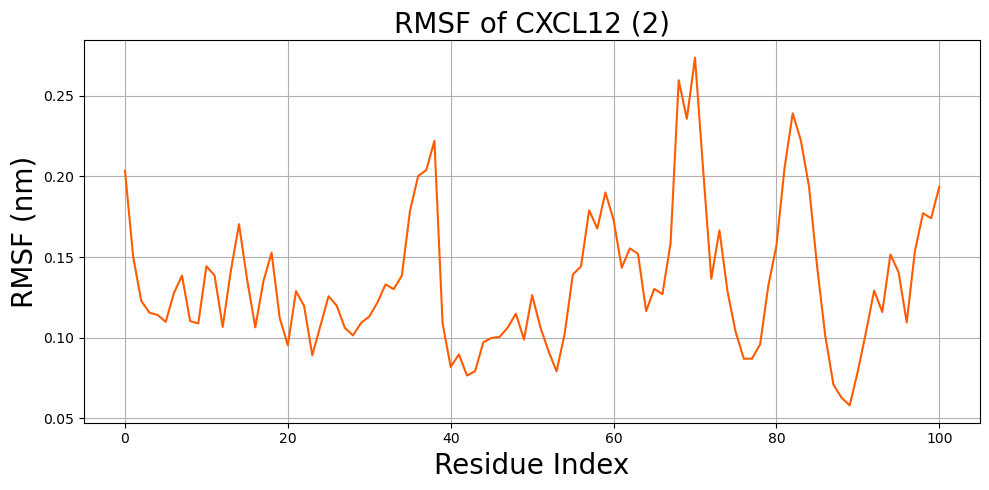

In [442]:
xvg_path = "/Users/farahzainab/Documents/CXCR4-CXCL12-run3/rmsf_cxcl123.xvg"

# === Load data (ignore comments in XVG) ===
data = np.loadtxt(xvg_path, comments=["@", "#"])
residue_indices = np.arange(len(data[:, 0]))  # X-axis as residue index
rmsf = data[:, 1]  # Y-axis is RMSF in nm

# === Plot RMSF ===
plt.figure(figsize=(10, 5))
plt.plot(residue_indices, rmsf, color="XKCD:bright orange")
plt.xlabel("Residue Index", fontsize=20)
plt.ylabel("RMSF (nm)", fontsize=20)
plt.title("RMSF of CXCL12 (2)", fontsize=20)
plt.grid(True)
plt.tight_layout()
plt.savefig("3c4-c12alone_RMSF.png", dpi=300)
plt.show()

In [ ]:
#3 (CXCR4-CXCL12) 3th RMSD no jumps

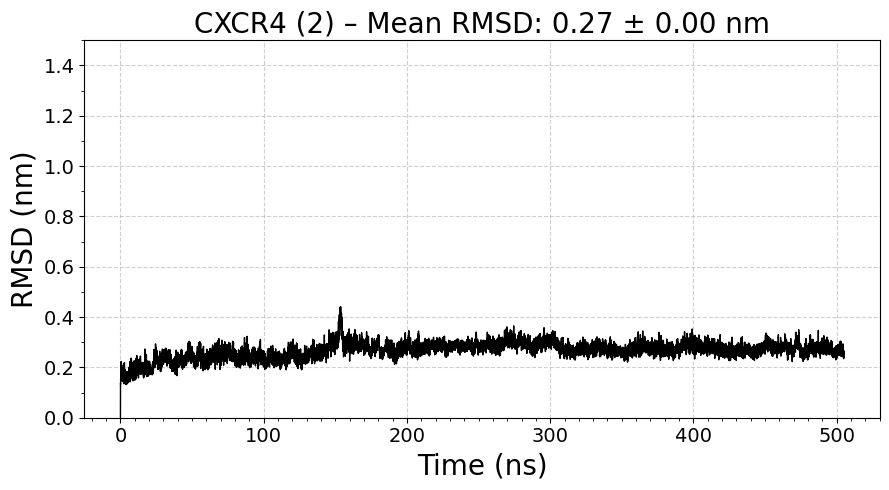

20201


In [443]:
xvg_path = "/Users/farahzainab/Documents/CXCR4-CXCL12-run3/rmsd_cxcr43.xvg"
label = "CXCR4 (2)"
color = "XKCD:black"  # or "XKCD:bright orange"
ylim = (0, 1.5)

# === Load XVG data ===
data = np.loadtxt(xvg_path, comments=["@", "#"])
time = data[:, 0] / 1000  # convert ps to ns
rmsd = data[:, 1]
hi = len(rmsd)

# === Compute stats ===
mean_rmsd = np.mean(rmsd)
sem_rmsd = np.std(rmsd) / np.sqrt(len(rmsd))

# === Plot ===
fig, ax = plt.subplots(figsize=(9, 5))
ax.plot(time, rmsd, color=color, label=label, linewidth=1)
#ax.fill_between(time, rmsd - sem_rmsd, rmsd + sem_rmsd, alpha=0.3, color=color)

ax.set_xlabel("Time (ns)", fontsize=20)
ax.set_ylabel("RMSD (nm)", fontsize=20)
ax.set_title(f"{label} – Mean RMSD: {mean_rmsd:.2f} ± {sem_rmsd:.2f} nm", fontsize=20)

ax.set_ylim(ylim)

# Ticks and grid
ax.tick_params(axis='both', which='major', labelsize=14)
ax.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
ax.xaxis.set_major_formatter(FormatStrFormatter('%.0f'))
ax.xaxis.set_minor_locator(MultipleLocator(10))
ax.yaxis.set_minor_locator(MultipleLocator(0.1))
ax.grid(True, which='major', linestyle='--', alpha=0.6)

# Legend
#custom_line = [Line2D([0], [0], color=color, lw=2)]
#ax.legend(custom_line, [label], fontsize=14, loc='upper right')

plt.tight_layout()
plt.savefig("3c4alone-c12_RMSD.png", dpi=300)
plt.show()
print(hi)

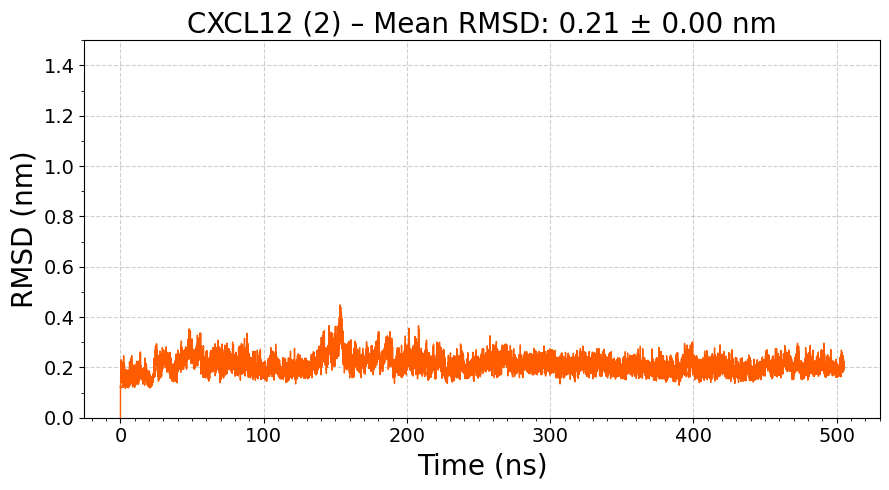

20201


In [444]:
xvg_path = "/Users/farahzainab/Documents/CXCR4-CXCL12-run3/rmsd_cxcl123.xvg"
label = "CXCL12 (2)"
color = "XKCD:bright orange"
ylim = (0, 1.5)

# === Load XVG data ===
data = np.loadtxt(xvg_path, comments=["@", "#"])
time = data[:, 0] / 1000  # convert ps to ns
rmsd = data[:, 1]
hi = len(rmsd)

# === Compute stats ===
mean_rmsd = np.mean(rmsd)
sem_rmsd = np.std(rmsd) / np.sqrt(len(rmsd))

# === Plot ===
fig, ax = plt.subplots(figsize=(9, 5))
ax.plot(time, rmsd, color=color, label=label, linewidth=1)
#ax.fill_between(time, rmsd - sem_rmsd, rmsd + sem_rmsd, alpha=0.3, color=color)

ax.set_xlabel("Time (ns)", fontsize=20)
ax.set_ylabel("RMSD (nm)", fontsize=20)
ax.set_title(f"{label} – Mean RMSD: {mean_rmsd:.2f} ± {sem_rmsd:.2f} nm", fontsize=20)

ax.set_ylim(ylim)

# Ticks and grid
ax.tick_params(axis='both', which='major', labelsize=14)
ax.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
ax.xaxis.set_major_formatter(FormatStrFormatter('%.0f'))
ax.xaxis.set_minor_locator(MultipleLocator(10))
ax.yaxis.set_minor_locator(MultipleLocator(0.1))
ax.grid(True, which='major', linestyle='--', alpha=0.6)

# Legend
#custom_line = [Line2D([0], [0], color=color, lw=2)]
#ax.legend(custom_line, [label], fontsize=14, loc='upper right')

plt.tight_layout()
plt.savefig("3c4-c12alone_RMSD.png", dpi=300)
plt.show()
print(hi)

In [ ]:
#4 (CXCR4-CXCL12) 4th RMSF no jumps

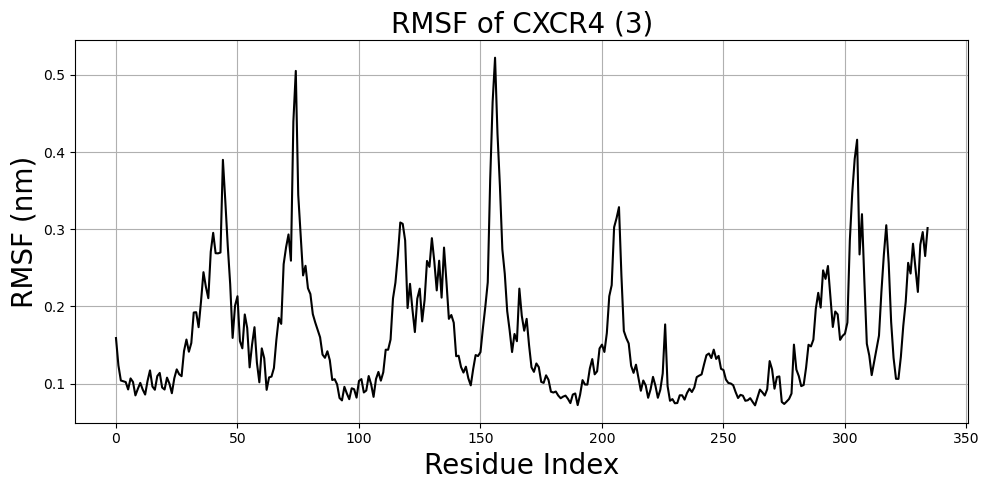

In [445]:
import numpy as np
import matplotlib.pyplot as plt

# === Path to your single RMSF XVG file ===
xvg_path = "/Users/farahzainab/Documents/CXCR4-CXCL12-run4/rmsf_cxcr44.xvg"

# === Load data (ignore comments in XVG) ===
data = np.loadtxt(xvg_path, comments=["@", "#"])
residue_indices = np.arange(len(data[:, 0]))  # X-axis as residue index
rmsf = data[:, 1]  # Y-axis is RMSF in nm

# === Plot RMSF ===
plt.figure(figsize=(10, 5))
plt.plot(residue_indices, rmsf, color="XKCD:black")
plt.xlabel("Residue Index", fontsize=20)
plt.ylabel("RMSF (nm)", fontsize=20)
plt.title("RMSF of CXCR4 (3)", fontsize=20)
plt.grid(True)
plt.tight_layout()
plt.savefig("4c4alone-c12_RMSF.png", dpi=300)
plt.show()


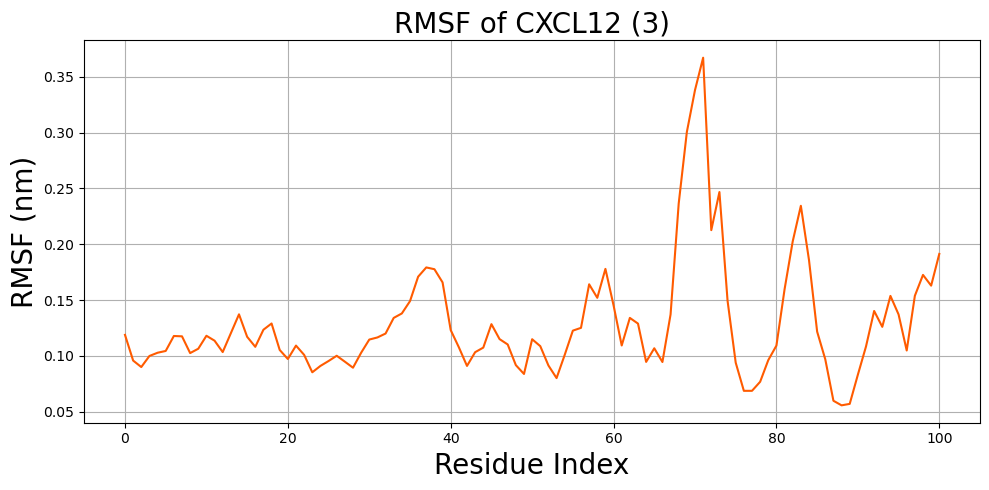

In [446]:
xvg_path = "/Users/farahzainab/Documents/CXCR4-CXCL12-run4/rmsf_cxcl124.xvg"

# === Load data (ignore comments in XVG) ===
data = np.loadtxt(xvg_path, comments=["@", "#"])
residue_indices = np.arange(len(data[:, 0]))  # X-axis as residue index
rmsf = data[:, 1]  # Y-axis is RMSF in nm

# === Plot RMSF ===
plt.figure(figsize=(10, 5))
plt.plot(residue_indices, rmsf, color="XKCD:bright orange")
plt.xlabel("Residue Index", fontsize=20)
plt.ylabel("RMSF (nm)", fontsize=20)
plt.title("RMSF of CXCL12 (3)", fontsize=20)
plt.grid(True)
plt.tight_layout()
plt.savefig("4c4-c12alone_RMSF.png", dpi=300)
plt.show()

In [ ]:
#4 (CXCR4-CXCL12) 4th RMSD no jumps

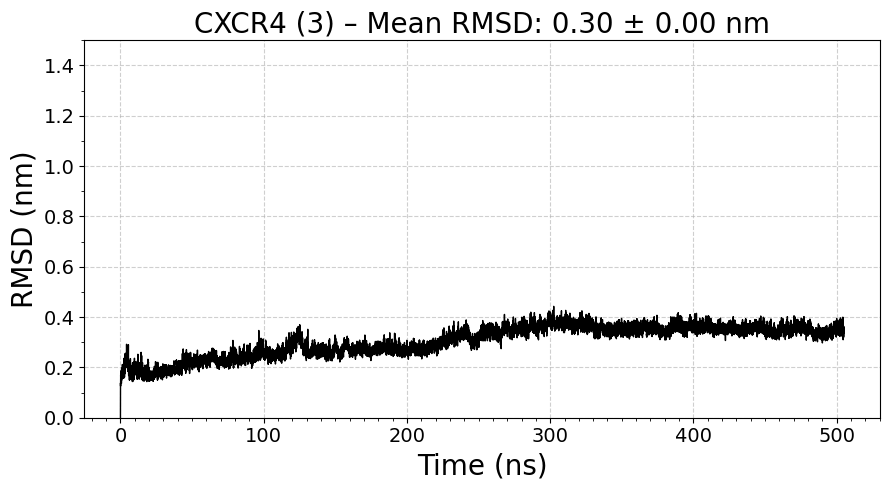

20201


In [447]:
xvg_path = "/Users/farahzainab/Documents/CXCR4-CXCL12-run4/rmsd_cxcr44.xvg"
label = "CXCR4 (3)"
color = "XKCD:black"  # or "XKCD:bright orange"
ylim = (0, 1.5)

# === Load XVG data ===
data = np.loadtxt(xvg_path, comments=["@", "#"])
time = data[:, 0] / 1000  # convert ps to ns
rmsd = data[:, 1]
hi = len(rmsd)

# === Compute stats ===
mean_rmsd = np.mean(rmsd)
sem_rmsd = np.std(rmsd) / np.sqrt(len(rmsd))

# === Plot ===
fig, ax = plt.subplots(figsize=(9, 5))
ax.plot(time, rmsd, color=color, label=label, linewidth=1)
#ax.fill_between(time, rmsd - sem_rmsd, rmsd + sem_rmsd, alpha=0.3, color=color)

ax.set_xlabel("Time (ns)", fontsize=20)
ax.set_ylabel("RMSD (nm)", fontsize=20)
ax.set_title(f"{label} – Mean RMSD: {mean_rmsd:.2f} ± {sem_rmsd:.2f} nm", fontsize=20)

ax.set_ylim(ylim)

# Ticks and grid
ax.tick_params(axis='both', which='major', labelsize=14)
ax.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
ax.xaxis.set_major_formatter(FormatStrFormatter('%.0f'))
ax.xaxis.set_minor_locator(MultipleLocator(10))
ax.yaxis.set_minor_locator(MultipleLocator(0.1))
ax.grid(True, which='major', linestyle='--', alpha=0.6)

# Legend
#custom_line = [Line2D([0], [0], color=color, lw=2)]
#ax.legend(custom_line, [label], fontsize=14, loc='upper right')

plt.tight_layout()
plt.savefig("4c4alone-c12_RMSD.png", dpi=300)
plt.show()
print(hi)

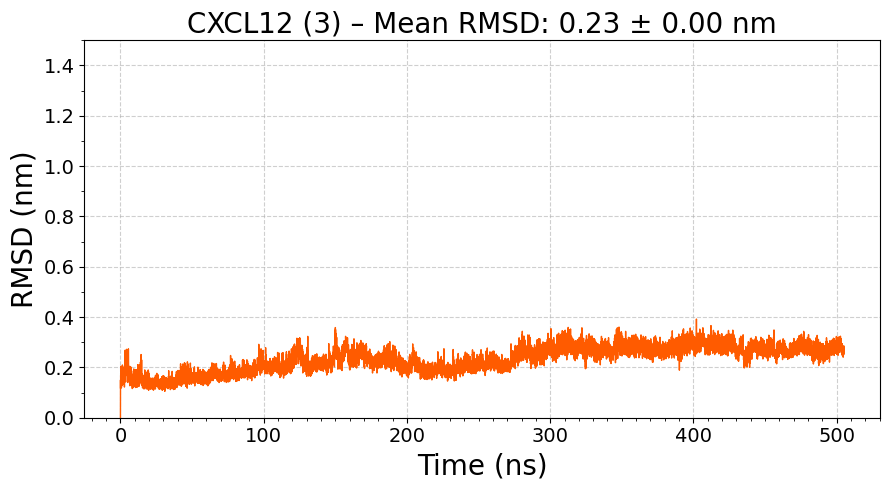

20201


In [448]:
xvg_path = "/Users/farahzainab/Documents/CXCR4-CXCL12-run4/rmsd_cxcl124.xvg"
label = "CXCL12 (3)"
color = "XKCD:bright orange"
ylim = (0, 1.5)

# === Load XVG data ===
data = np.loadtxt(xvg_path, comments=["@", "#"])
time = data[:, 0] / 1000  # convert ps to ns
rmsd = data[:, 1]
hi = len(rmsd)

# === Compute stats ===
mean_rmsd = np.mean(rmsd)
sem_rmsd = np.std(rmsd) / np.sqrt(len(rmsd))

# === Plot ===
fig, ax = plt.subplots(figsize=(9, 5))
ax.plot(time, rmsd, color=color, label=label, linewidth=1)
#ax.fill_between(time, rmsd - sem_rmsd, rmsd + sem_rmsd, alpha=0.3, color=color)

ax.set_xlabel("Time (ns)", fontsize=20)
ax.set_ylabel("RMSD (nm)", fontsize=20)
ax.set_title(f"{label} – Mean RMSD: {mean_rmsd:.2f} ± {sem_rmsd:.2f} nm", fontsize=20)

ax.set_ylim(ylim)

# Ticks and grid
ax.tick_params(axis='both', which='major', labelsize=14)
ax.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
ax.xaxis.set_major_formatter(FormatStrFormatter('%.0f'))
ax.xaxis.set_minor_locator(MultipleLocator(10))
ax.yaxis.set_minor_locator(MultipleLocator(0.1))
ax.grid(True, which='major', linestyle='--', alpha=0.6)

# Legend
#custom_line = [Line2D([0], [0], color=color, lw=2)]
#ax.legend(custom_line, [label], fontsize=14, loc='upper right')

plt.tight_layout()
plt.savefig("4c4-c12alone_RMSD.png", dpi=300)
plt.show()
print(hi)

In [ ]:
#5 (CXCR4-CXCL12) 5th RMSF no jumps

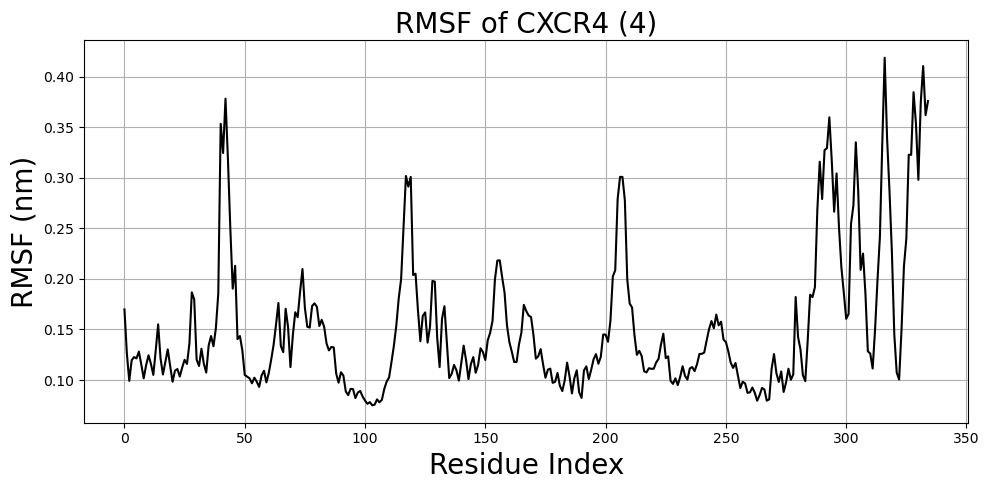

In [449]:
import numpy as np
import matplotlib.pyplot as plt

# === Path to your single RMSF XVG file ===
xvg_path = "/Users/farahzainab/Documents/CXCR4-CXCL12-run5/rmsf_cxcr45.xvg"

# === Load data (ignore comments in XVG) ===
data = np.loadtxt(xvg_path, comments=["@", "#"])
residue_indices = np.arange(len(data[:, 0]))  # X-axis as residue index
rmsf = data[:, 1]  # Y-axis is RMSF in nm

# === Plot RMSF ===
plt.figure(figsize=(10, 5))
plt.plot(residue_indices, rmsf, color="XKCD:black")
plt.xlabel("Residue Index", fontsize=20)
plt.ylabel("RMSF (nm)", fontsize=20)
plt.title("RMSF of CXCR4 (4)", fontsize=20)
plt.grid(True)
plt.tight_layout()
plt.savefig("5c4alone-c12_RMSF.png", dpi=300)
plt.show()

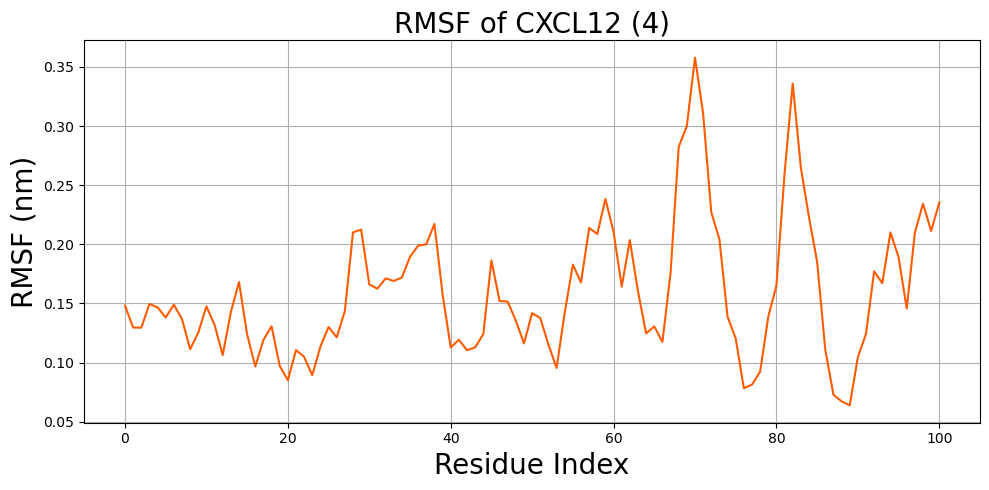

In [450]:
xvg_path = "/Users/farahzainab/Documents/CXCR4-CXCL12-run5/rmsf_cxcl125.xvg"

# === Load data (ignore comments in XVG) ===
data = np.loadtxt(xvg_path, comments=["@", "#"])
residue_indices = np.arange(len(data[:, 0]))  # X-axis as residue index
rmsf = data[:, 1]  # Y-axis is RMSF in nm

# === Plot RMSF ===
plt.figure(figsize=(10, 5))
plt.plot(residue_indices, rmsf, color="XKCD:bright orange")
plt.xlabel("Residue Index", fontsize=20)
plt.ylabel("RMSF (nm)", fontsize=20)
plt.title("RMSF of CXCL12 (4)", fontsize=20)
plt.grid(True)
plt.tight_layout()
plt.savefig("5c4-c12alone_RMSF.png", dpi=300)
plt.show()

In [ ]:
#5 (CXCR4-CXCL12) 5th RMSD no jumps

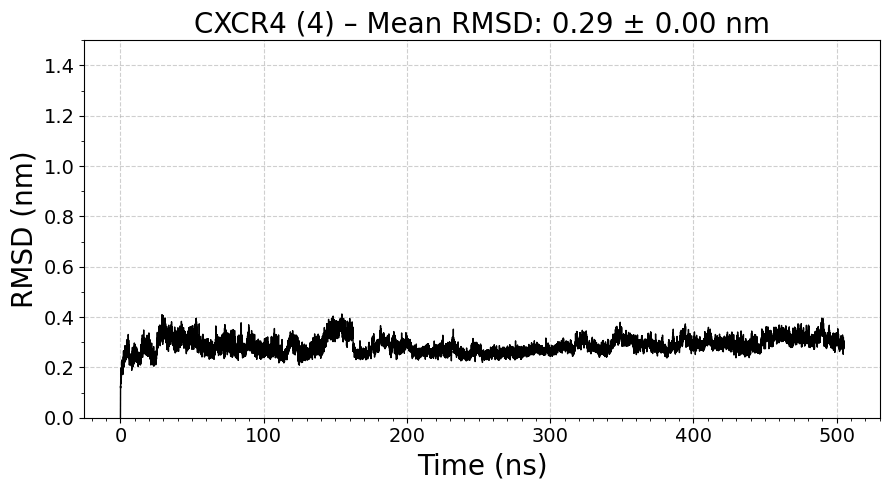

20201


In [451]:
xvg_path = "/Users/farahzainab/Documents/CXCR4-CXCL12-run5/rmsd_cxcr45.xvg"
label = "CXCR4 (4)"
color = "XKCD:black"  # or "XKCD:bright orange"
ylim = (0, 1.5)

# === Load XVG data ===
data = np.loadtxt(xvg_path, comments=["@", "#"])
time = data[:, 0] / 1000  # convert ps to ns
rmsd = data[:, 1]
hi = len(rmsd)

# === Compute stats ===
mean_rmsd = np.mean(rmsd)
sem_rmsd = np.std(rmsd) / np.sqrt(len(rmsd))

# === Plot ===
fig, ax = plt.subplots(figsize=(9, 5))
ax.plot(time, rmsd, color=color, label=label, linewidth=1)
#ax.fill_between(time, rmsd - sem_rmsd, rmsd + sem_rmsd, alpha=0.3, color=color)

ax.set_xlabel("Time (ns)", fontsize=20)
ax.set_ylabel("RMSD (nm)", fontsize=20)
ax.set_title(f"{label} – Mean RMSD: {mean_rmsd:.2f} ± {sem_rmsd:.2f} nm", fontsize=20)

ax.set_ylim(ylim)

# Ticks and grid
ax.tick_params(axis='both', which='major', labelsize=14)
ax.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
ax.xaxis.set_major_formatter(FormatStrFormatter('%.0f'))
ax.xaxis.set_minor_locator(MultipleLocator(10))
ax.yaxis.set_minor_locator(MultipleLocator(0.1))
ax.grid(True, which='major', linestyle='--', alpha=0.6)

# Legend
#custom_line = [Line2D([0], [0], color=color, lw=2)]
#ax.legend(custom_line, [label], fontsize=14, loc='upper right')

plt.tight_layout()
plt.savefig("5c4alone-c12_RMSD.png", dpi=300)
plt.show()
print(hi)

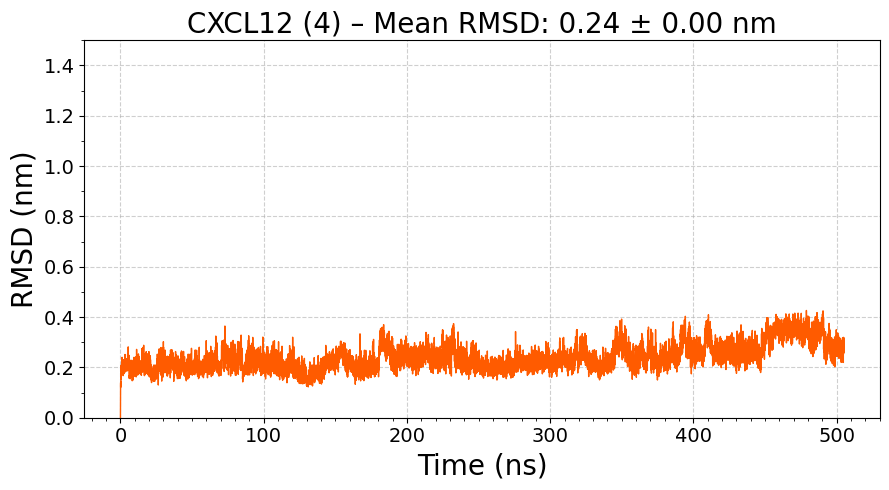

20201


In [452]:
xvg_path = "/Users/farahzainab/Documents/CXCR4-CXCL12-run5/rmsd_cxcl125.xvg"
label = "CXCL12 (4)"
color = "XKCD:bright orange"
ylim = (0, 1.5)

# === Load XVG data ===
data = np.loadtxt(xvg_path, comments=["@", "#"])
time = data[:, 0] / 1000  # convert ps to ns
rmsd = data[:, 1]
hi = len(rmsd)

# === Compute stats ===
mean_rmsd = np.mean(rmsd)
sem_rmsd = np.std(rmsd) / np.sqrt(len(rmsd))

# === Plot ===
fig, ax = plt.subplots(figsize=(9, 5))
ax.plot(time, rmsd, color=color, label=label, linewidth=1)
#ax.fill_between(time, rmsd - sem_rmsd, rmsd + sem_rmsd, alpha=0.3, color=color)

ax.set_xlabel("Time (ns)", fontsize=20)
ax.set_ylabel("RMSD (nm)", fontsize=20)
ax.set_title(f"{label} – Mean RMSD: {mean_rmsd:.2f} ± {sem_rmsd:.2f} nm", fontsize=20)

ax.set_ylim(ylim)

# Ticks and grid
ax.tick_params(axis='both', which='major', labelsize=14)
ax.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
ax.xaxis.set_major_formatter(FormatStrFormatter('%.0f'))
ax.xaxis.set_minor_locator(MultipleLocator(10))
ax.yaxis.set_minor_locator(MultipleLocator(0.1))
ax.grid(True, which='major', linestyle='--', alpha=0.6)

# Legend
#custom_line = [Line2D([0], [0], color=color, lw=2)]
#ax.legend(custom_line, [label], fontsize=14, loc='upper right')

plt.tight_layout()
plt.savefig("5c4-c12alone_RMSD.png", dpi=300)
plt.show()
print(hi)

In [ ]:
#2 (CXCR4) 2nd

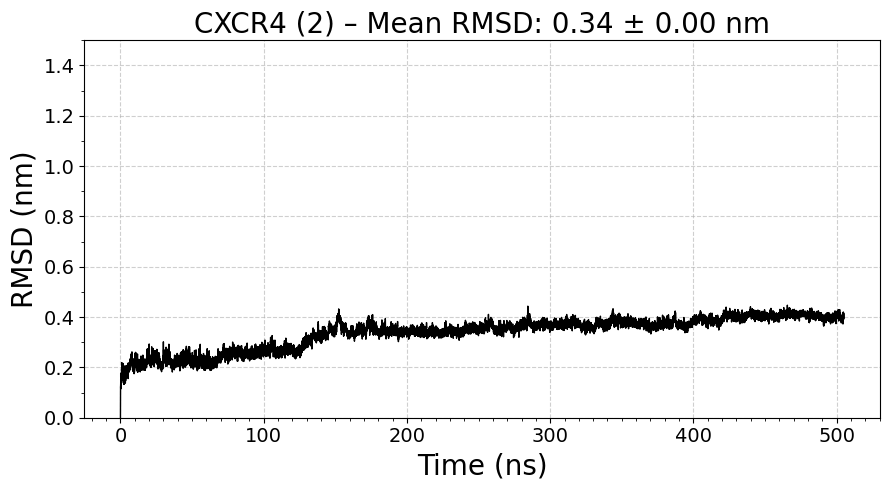

20201


In [534]:
# === EDIT this to match your file path ===
xvg_path = "/Users/farahzainab/Documents/cxcr4-2nd/rmsd_cxcr42.xvg"
label = "CXCR4 (2)"
color = "XKCD:black"
ylim = (0, 1.5)

# === Load XVG data ===
data = np.loadtxt(xvg_path, comments=["@", "#"])
time = data[:, 0] / 1000  # convert ps to ns
rmsd = data[:, 1]
hi = len(rmsd)

# === Compute stats ===
mean_rmsd = np.mean(rmsd)
sem_rmsd = np.std(rmsd) / np.sqrt(len(rmsd))

# === Plot ===
fig, ax = plt.subplots(figsize=(9, 5))
ax.plot(time, rmsd, color=color, label=label, linewidth=1)
#ax.fill_between(time, rmsd - sem_rmsd, rmsd + sem_rmsd, alpha=0.3, color=color)

ax.set_xlabel("Time (ns)", fontsize=20)
ax.set_ylabel("RMSD (nm)", fontsize=20)
ax.set_title(f"{label} – Mean RMSD: {mean_rmsd:.2f} ± {sem_rmsd:.2f} nm", fontsize=20)

ax.set_ylim(ylim)

# Ticks and grid
ax.tick_params(axis='both', which='major', labelsize=14)
ax.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
ax.xaxis.set_major_formatter(FormatStrFormatter('%.0f'))
ax.xaxis.set_minor_locator(MultipleLocator(10))
ax.yaxis.set_minor_locator(MultipleLocator(0.1))
ax.grid(True, which='major', linestyle='--', alpha=0.6)

# Legend
#custom_line = [Line2D([0], [0], color=color, lw=2)]
#ax.legend(custom_line, [label], fontsize=14, loc='upper right')

plt.tight_layout()
plt.savefig("cxcr42-alone_RMSD.png", dpi=300)
plt.show()
print(hi)

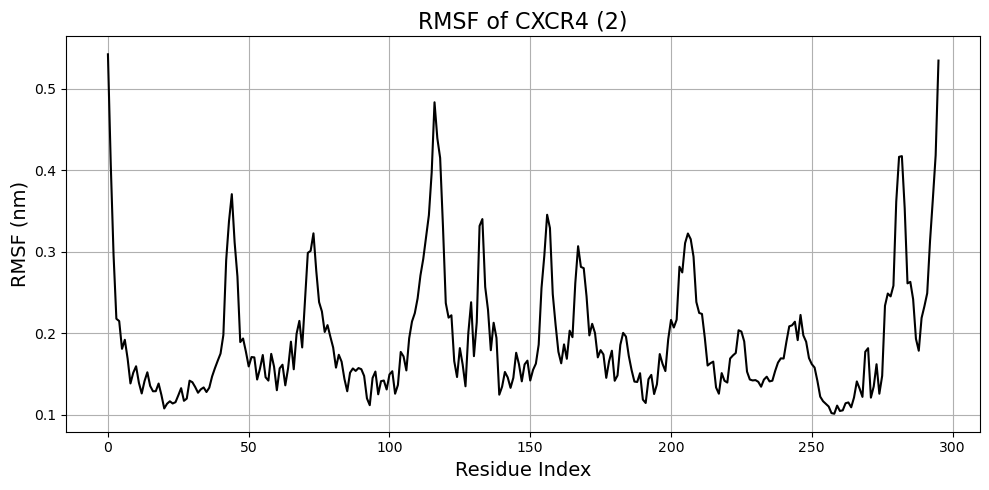

In [535]:
import numpy as np
import matplotlib.pyplot as plt

# === Path to your single RMSF XVG file ===
xvg_path = "/Users/farahzainab/Documents/cxcr4-2nd/rmsf_cxcr42.xvg"

# === Load data (ignore comments in XVG) ===
data = np.loadtxt(xvg_path, comments=["@", "#"])
residue_indices = np.arange(len(data[:, 0]))  # X-axis as residue index
rmsf = data[:, 1]  # Y-axis is RMSF in nm

# === Plot RMSF ===
plt.figure(figsize=(10, 5))
plt.plot(residue_indices, rmsf, color="XKCD:black")
plt.xlabel("Residue Index", fontsize=14)
plt.ylabel("RMSF (nm)", fontsize=14)
plt.title("RMSF of CXCR4 (2)", fontsize=16)
plt.grid(True)
plt.tight_layout()
plt.savefig("cxcr42-alone_RMSF.png", dpi=300)
plt.show()

In [ ]:
#2 (CXCR4) 3rd

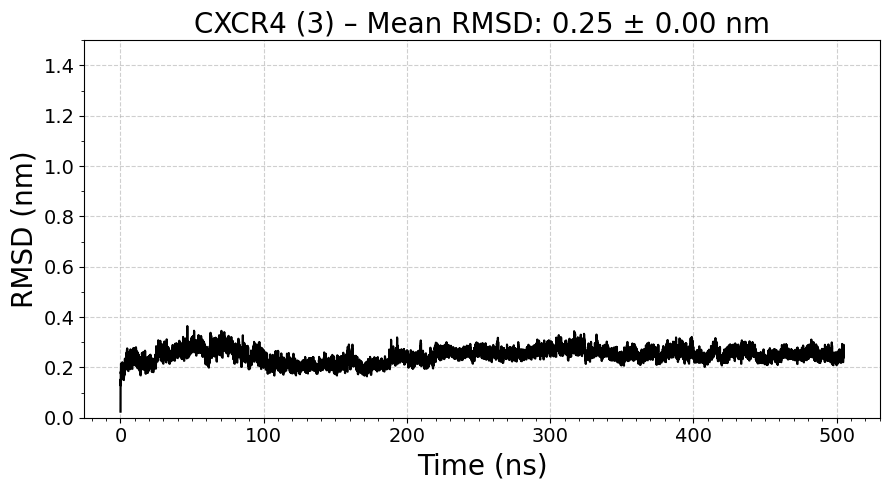

20201


In [536]:
# === EDIT this to match your file path ===
xvg_path = "/Users/farahzainab/Documents/cxcr4-3rd/rmsd_cxcr43.xvg"
label = "CXCR4 (3)"
color = "XKCD:black"
ylim = (0, 1.5)

# === Load XVG data ===
data = np.loadtxt(xvg_path, comments=["@", "#"])
time = data[:, 0] / 1000  # convert ps to ns
rmsd = data[:, 1]
hi = len(rmsd)

# === Compute stats ===
mean_rmsd = np.mean(rmsd)
sem_rmsd = np.std(rmsd) / np.sqrt(len(rmsd))

# === Plot ===
fig, ax = plt.subplots(figsize=(9, 5))
ax.plot(time, rmsd, color=color, label=label)
ax.fill_between(time, rmsd - sem_rmsd, rmsd + sem_rmsd, alpha=0.3, color=color)

ax.set_xlabel("Time (ns)", fontsize=20)
ax.set_ylabel("RMSD (nm)", fontsize=20)
ax.set_title(f"{label} – Mean RMSD: {mean_rmsd:.2f} ± {sem_rmsd:.2f} nm", fontsize=20)

ax.set_ylim(ylim)

# Ticks and grid
ax.tick_params(axis='both', which='major', labelsize=14)
ax.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
ax.xaxis.set_major_formatter(FormatStrFormatter('%.0f'))
ax.xaxis.set_minor_locator(MultipleLocator(10))
ax.yaxis.set_minor_locator(MultipleLocator(0.1))
ax.grid(True, which='major', linestyle='--', alpha=0.6)

# Legend
#custom_line = [Line2D([0], [0], color=color, lw=2)]
#ax.legend(custom_line, [label], fontsize=14, loc='upper right')

plt.tight_layout()
plt.savefig("cxcr43-alone_RMSD.png", dpi=300)
plt.show()
print(hi)

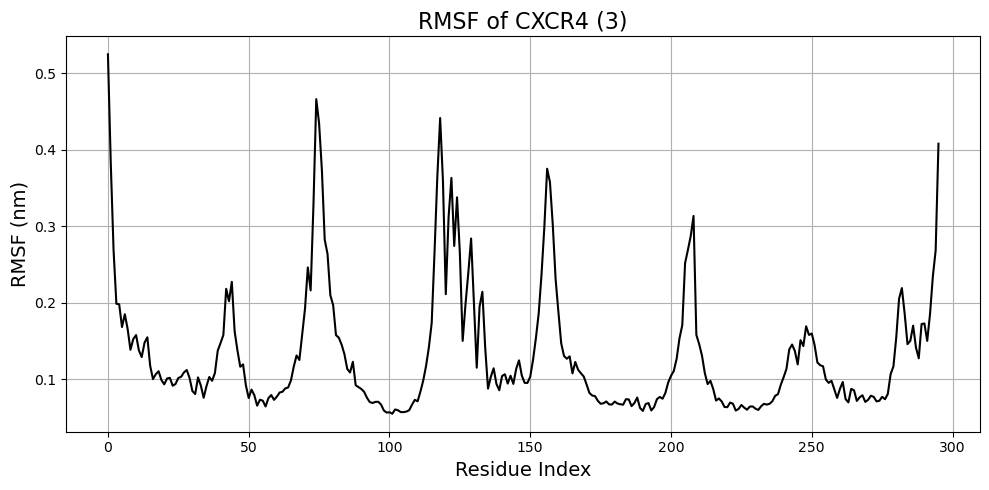

In [537]:
import numpy as np
import matplotlib.pyplot as plt

# === Path to your single RMSF XVG file ===
xvg_path = "/Users/farahzainab/Documents/cxcr4-3rd/rmsf_cxcr43.xvg"

# === Load data (ignore comments in XVG) ===
data = np.loadtxt(xvg_path, comments=["@", "#"])
residue_indices = np.arange(len(data[:, 0]))  # X-axis as residue index
rmsf = data[:, 1]  # Y-axis is RMSF in nm

# === Plot RMSF ===
plt.figure(figsize=(10, 5))
plt.plot(residue_indices, rmsf, color="XKCD:black")
plt.xlabel("Residue Index", fontsize=14)
plt.ylabel("RMSF (nm)", fontsize=14)
plt.title("RMSF of CXCR4 (3)", fontsize=16)
plt.grid(True)
plt.tight_layout()
plt.savefig("cxcr43-alone_RMSF.png", dpi=300)
plt.show()

In [ ]:
#3 (CXCR4) 4th

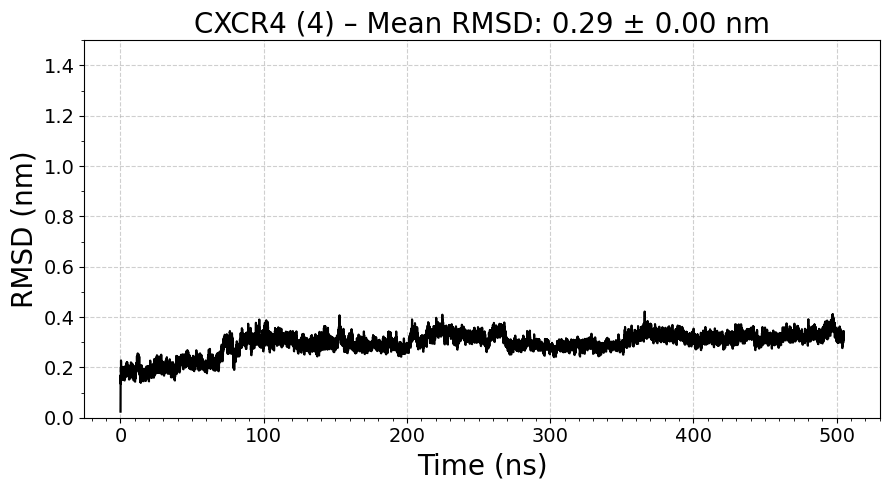

20201


In [538]:
xvg_path = "/Users/farahzainab/Documents/cxcr4-4th/rmsd_cxcr44.xvg"
label = "CXCR4 (4)"
color = "XKCD:black"
ylim = (0, 1.5)

# === Load XVG data ===
data = np.loadtxt(xvg_path, comments=["@", "#"])
time = data[:, 0] / 1000  # convert ps to ns
rmsd = data[:, 1]
hi = len(rmsd)

# === Compute stats ===
mean_rmsd = np.mean(rmsd)
sem_rmsd = np.std(rmsd) / np.sqrt(len(rmsd))

# === Plot ===
fig, ax = plt.subplots(figsize=(9, 5))
ax.plot(time, rmsd, color=color, label=label)
ax.fill_between(time, rmsd - sem_rmsd, rmsd + sem_rmsd, alpha=0.3, color=color)

ax.set_xlabel("Time (ns)", fontsize=20)
ax.set_ylabel("RMSD (nm)", fontsize=20)
ax.set_title(f"{label} – Mean RMSD: {mean_rmsd:.2f} ± {sem_rmsd:.2f} nm", fontsize=20)

ax.set_ylim(ylim)

# Ticks and grid
ax.tick_params(axis='both', which='major', labelsize=14)
ax.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
ax.xaxis.set_major_formatter(FormatStrFormatter('%.0f'))
ax.xaxis.set_minor_locator(MultipleLocator(10))
ax.yaxis.set_minor_locator(MultipleLocator(0.1))
ax.grid(True, which='major', linestyle='--', alpha=0.6)

# Legend
#custom_line = [Line2D([0], [0], color=color, lw=2)]
#ax.legend(custom_line, [label], fontsize=14, loc='upper right')

plt.tight_layout()
plt.savefig("cxcr44-alone_RMSD.png", dpi=300)
plt.show()
print(hi)

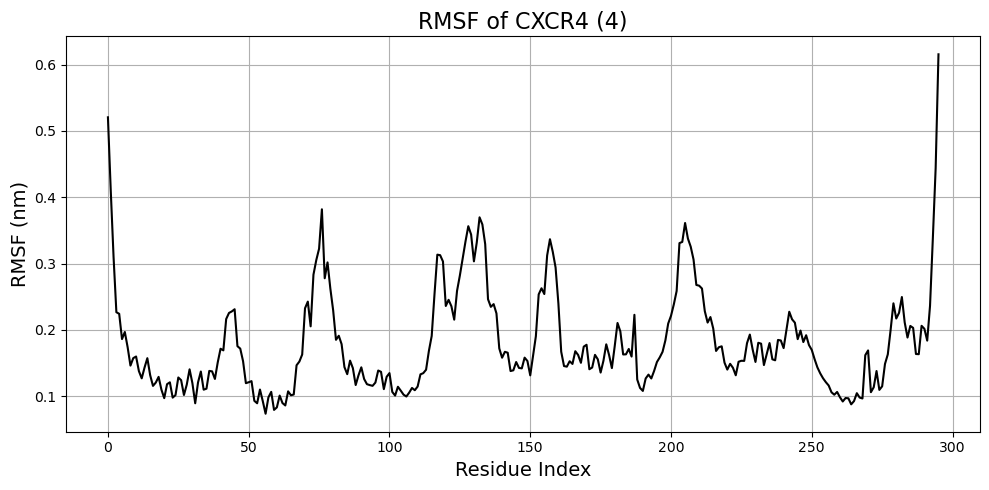

In [539]:
import numpy as np
import matplotlib.pyplot as plt

# === Path to your single RMSF XVG file ===
xvg_path = "/Users/farahzainab/Documents/cxcr4-4th/rmsf_cxcr44.xvg"

# === Load data (ignore comments in XVG) ===
data = np.loadtxt(xvg_path, comments=["@", "#"])
residue_indices = np.arange(len(data[:, 0]))  # X-axis as residue index
rmsf = data[:, 1]  # Y-axis is RMSF in nm

# === Plot RMSF ===
plt.figure(figsize=(10, 5))
plt.plot(residue_indices, rmsf, color="XKCD:black")
plt.xlabel("Residue Index", fontsize=14)
plt.ylabel("RMSF (nm)", fontsize=14)
plt.title("RMSF of CXCR4 (4)", fontsize=16)
plt.grid(True)
plt.tight_layout()
plt.savefig("cxcr44-alone_RMSF.png", dpi=300)
plt.show()

In [ ]:
#4 (CXCR4) 5th

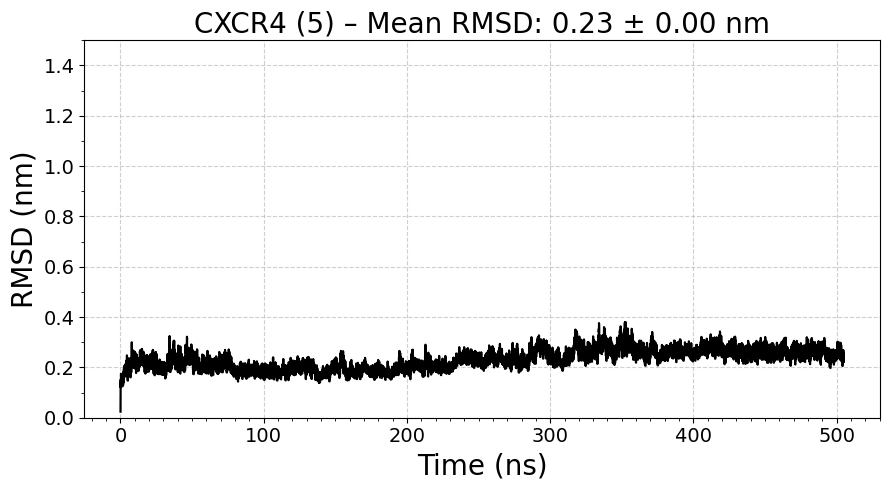

20201


In [540]:
xvg_path = "/Users/farahzainab/Documents/cxcr4-5th/rmsd_cxcr45.xvg"
label = "CXCR4 (5)"
color = "XKCD:black"
ylim = (0, 1.5)

# === Load XVG data ===
data = np.loadtxt(xvg_path, comments=["@", "#"])
time = data[:, 0] / 1000  # convert ps to ns
rmsd = data[:, 1]
hi = len(rmsd)

# === Compute stats ===
mean_rmsd = np.mean(rmsd)
sem_rmsd = np.std(rmsd) / np.sqrt(len(rmsd))

# === Plot ===
fig, ax = plt.subplots(figsize=(9, 5))
ax.plot(time, rmsd, color=color, label=label)
ax.fill_between(time, rmsd - sem_rmsd, rmsd + sem_rmsd, alpha=0.3, color=color)

ax.set_xlabel("Time (ns)", fontsize=20)
ax.set_ylabel("RMSD (nm)", fontsize=20)
ax.set_title(f"{label} – Mean RMSD: {mean_rmsd:.2f} ± {sem_rmsd:.2f} nm", fontsize=20)

ax.set_ylim(ylim)

# Ticks and grid
ax.tick_params(axis='both', which='major', labelsize=14)
ax.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
ax.xaxis.set_major_formatter(FormatStrFormatter('%.0f'))
ax.xaxis.set_minor_locator(MultipleLocator(10))
ax.yaxis.set_minor_locator(MultipleLocator(0.1))
ax.grid(True, which='major', linestyle='--', alpha=0.6)

# Legend
#custom_line = [Line2D([0], [0], color=color, lw=2)]
#ax.legend(custom_line, [label], fontsize=14, loc='upper right')

plt.tight_layout()
plt.savefig("cxcr45-alone_RMSD.png", dpi=300)
plt.show()
print(hi)

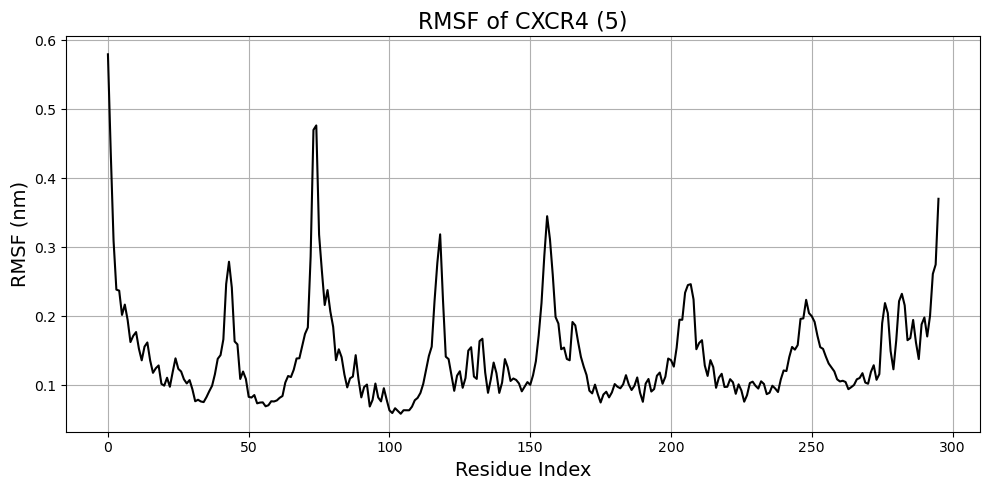

In [541]:
# === Path to your single RMSF XVG file ===
xvg_path = "/Users/farahzainab/Documents/cxcr4-5th/rmsf_cxcr45.xvg"

# === Load data (ignore comments in XVG) ===
data = np.loadtxt(xvg_path, comments=["@", "#"])
residue_indices = np.arange(len(data[:, 0]))  # X-axis as residue index
rmsf = data[:, 1]  # Y-axis is RMSF in nm

# === Plot RMSF ===
plt.figure(figsize=(10, 5))
plt.plot(residue_indices, rmsf, color="XKCD:black")
plt.xlabel("Residue Index", fontsize=14)
plt.ylabel("RMSF (nm)", fontsize=14)
plt.title("RMSF of CXCR4 (5)", fontsize=16)
plt.grid(True)
plt.tight_layout()
plt.savefig("cxcr45-alone_RMSF.png", dpi=300)
plt.show()

In [ ]:
#3 (CXCR4-ENTF*) Jumps

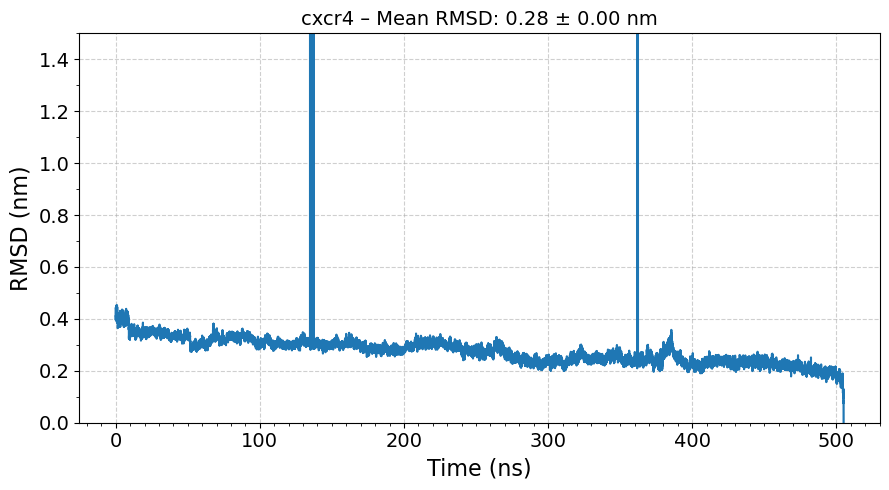

20201


In [39]:
# === EDIT this to match your file path ===
xvg_path = "/Users/farahzainab/Documents/CXCR4-Entf*-run2/rmsd_cxcr4.xvg"
label = "cxcr4"
color = "tab:blue"  # or "XKCD:bright orange"
ylim = (0, 1.5)

# === Load XVG data ===
data = np.loadtxt(xvg_path, comments=["@", "#"])
time = data[:, 0] / 1000  # convert ps to ns
rmsd = data[:, 1]
hi = len(rmsd)

# === Compute stats ===
mean_rmsd = np.mean(rmsd)
sem_rmsd = np.std(rmsd) / np.sqrt(len(rmsd))

# === Plot ===
fig, ax = plt.subplots(figsize=(9, 5))
ax.plot(time, rmsd, color=color, label=label)
ax.fill_between(time, rmsd - sem_rmsd, rmsd + sem_rmsd, alpha=0.3, color=color)

ax.set_xlabel("Time (ns)", fontsize=16)
ax.set_ylabel("RMSD (nm)", fontsize=16)
ax.set_title(f"{label} – Mean RMSD: {mean_rmsd:.2f} ± {sem_rmsd:.2f} nm", fontsize=14)

ax.set_ylim(ylim)

# Ticks and grid
ax.tick_params(axis='both', which='major', labelsize=14)
ax.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
ax.xaxis.set_major_formatter(FormatStrFormatter('%.0f'))
ax.xaxis.set_minor_locator(MultipleLocator(10))
ax.yaxis.set_minor_locator(MultipleLocator(0.1))
ax.grid(True, which='major', linestyle='--', alpha=0.6)

# Legend
#custom_line = [Line2D([0], [0], color=color, lw=2)]
#ax.legend(custom_line, [label], fontsize=14, loc='upper right')

plt.tight_layout()
#plt.savefig("CXCR4try_RMSD.png", dpi=300)
plt.show()
print(hi)

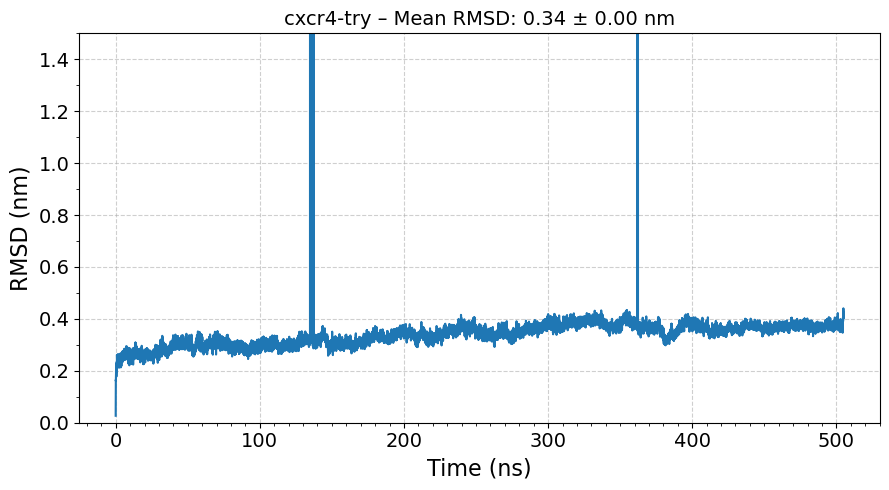

20201


In [46]:
# === EDIT this to match your file path ===
xvg_path = "/Users/farahzainab/Documents/CXCR4-Entf*-run2/rmsd_cxcr4-try.xvg"
label = "cxcr4-try"
color = "tab:blue"  # or "XKCD:bright orange"
ylim = (0, 1.5)

# === Load XVG data ===
data = np.loadtxt(xvg_path, comments=["@", "#"])
time = data[:, 0] / 1000  # convert ps to ns
rmsd = data[:, 1]
hi = len(rmsd)

# === Compute stats ===
mean_rmsd = np.mean(rmsd)
sem_rmsd = np.std(rmsd) / np.sqrt(len(rmsd))

# === Plot ===
fig, ax = plt.subplots(figsize=(9, 5))
ax.plot(time, rmsd, color=color, label=label)
ax.fill_between(time, rmsd - sem_rmsd, rmsd + sem_rmsd, alpha=0.3, color=color)

ax.set_xlabel("Time (ns)", fontsize=16)
ax.set_ylabel("RMSD (nm)", fontsize=16)
ax.set_title(f"{label} – Mean RMSD: {mean_rmsd:.2f} ± {sem_rmsd:.2f} nm", fontsize=14)

ax.set_ylim(ylim)

# Ticks and grid
ax.tick_params(axis='both', which='major', labelsize=14)
ax.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
ax.xaxis.set_major_formatter(FormatStrFormatter('%.0f'))
ax.xaxis.set_minor_locator(MultipleLocator(10))
ax.yaxis.set_minor_locator(MultipleLocator(0.1))
ax.grid(True, which='major', linestyle='--', alpha=0.6)

# Legend
#custom_line = [Line2D([0], [0], color=color, lw=2)]
#ax.legend(custom_line, [label], fontsize=14, loc='upper right')

plt.tight_layout()
#plt.savefig("CXCR4try_RMSD.png", dpi=300)
plt.show()
print(hi)

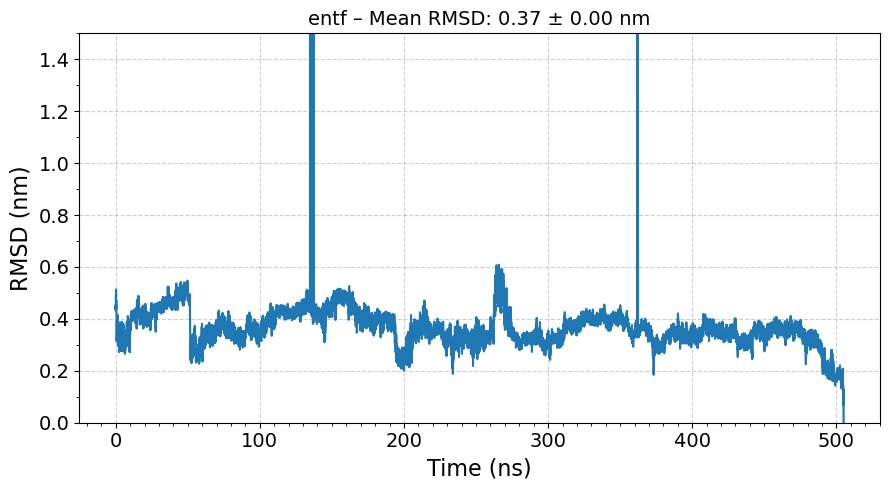

20201


In [45]:
# === EDIT this to match your file path ===
xvg_path = "/Users/farahzainab/Documents/CXCR4-Entf*-run2/rmsd_entf.xvg"
label = "entf"
color = "tab:blue"  # or "XKCD:bright orange"
ylim = (0, 1.5)

# === Load XVG data ===
data = np.loadtxt(xvg_path, comments=["@", "#"])
time = data[:, 0] / 1000  # convert ps to ns
rmsd = data[:, 1]
hi = len(rmsd)

# === Compute stats ===
mean_rmsd = np.mean(rmsd)
sem_rmsd = np.std(rmsd) / np.sqrt(len(rmsd))

# === Plot ===
fig, ax = plt.subplots(figsize=(9, 5))
ax.plot(time, rmsd, color=color, label=label)
ax.fill_between(time, rmsd - sem_rmsd, rmsd + sem_rmsd, alpha=0.3, color=color)

ax.set_xlabel("Time (ns)", fontsize=16)
ax.set_ylabel("RMSD (nm)", fontsize=16)
ax.set_title(f"{label} – Mean RMSD: {mean_rmsd:.2f} ± {sem_rmsd:.2f} nm", fontsize=14)

ax.set_ylim(ylim)

# Ticks and grid
ax.tick_params(axis='both', which='major', labelsize=14)
ax.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
ax.xaxis.set_major_formatter(FormatStrFormatter('%.0f'))
ax.xaxis.set_minor_locator(MultipleLocator(10))
ax.yaxis.set_minor_locator(MultipleLocator(0.1))
ax.grid(True, which='major', linestyle='--', alpha=0.6)

# Legend
#custom_line = [Line2D([0], [0], color=color, lw=2)]
#ax.legend(custom_line, [label], fontsize=14, loc='upper right')

plt.tight_layout()
#plt.savefig("CXCR4try_RMSD.png", dpi=300)
plt.show()
print(hi)

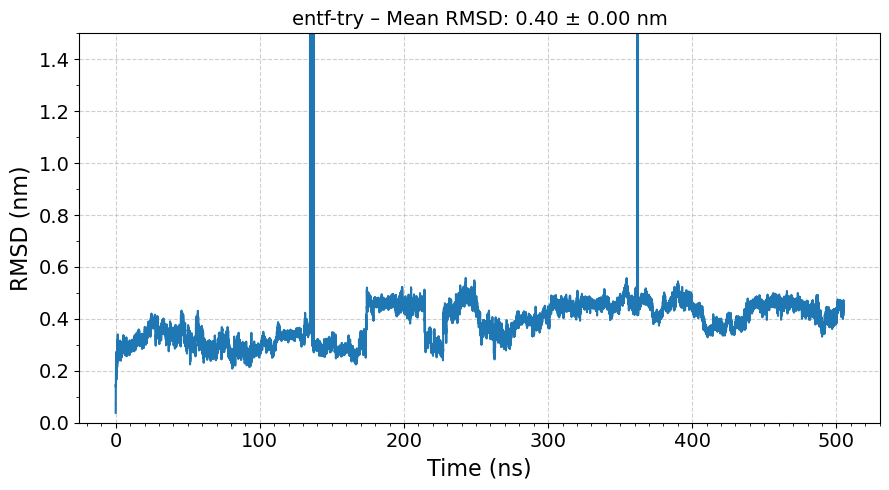

20201


In [44]:
# === EDIT this to match your file path ===
xvg_path = "/Users/farahzainab/Documents/CXCR4-Entf*-run2/rmsd_entf-try.xvg"
label = "entf-try"
color = "tab:blue"  # or "XKCD:bright orange"
ylim = (0, 1.5)

# === Load XVG data ===
data = np.loadtxt(xvg_path, comments=["@", "#"])
time = data[:, 0] / 1000  # convert ps to ns
rmsd = data[:, 1]
hi = len(rmsd)

# === Compute stats ===
mean_rmsd = np.mean(rmsd)
sem_rmsd = np.std(rmsd) / np.sqrt(len(rmsd))

# === Plot ===
fig, ax = plt.subplots(figsize=(9, 5))
ax.plot(time, rmsd, color=color, label=label)
ax.fill_between(time, rmsd - sem_rmsd, rmsd + sem_rmsd, alpha=0.3, color=color)

ax.set_xlabel("Time (ns)", fontsize=16)
ax.set_ylabel("RMSD (nm)", fontsize=16)
ax.set_title(f"{label} – Mean RMSD: {mean_rmsd:.2f} ± {sem_rmsd:.2f} nm", fontsize=14)

ax.set_ylim(ylim)

# Ticks and grid
ax.tick_params(axis='both', which='major', labelsize=14)
ax.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
ax.xaxis.set_major_formatter(FormatStrFormatter('%.0f'))
ax.xaxis.set_minor_locator(MultipleLocator(10))
ax.yaxis.set_minor_locator(MultipleLocator(0.1))
ax.grid(True, which='major', linestyle='--', alpha=0.6)

# Legend
#custom_line = [Line2D([0], [0], color=color, lw=2)]
#ax.legend(custom_line, [label], fontsize=14, loc='upper right')

plt.tight_layout()
#plt.savefig("CXCR4try_RMSD.png", dpi=300)
plt.show()
print(hi)

In [ ]:
#3 (CXCR4-Entf*) Nojumps RMSD

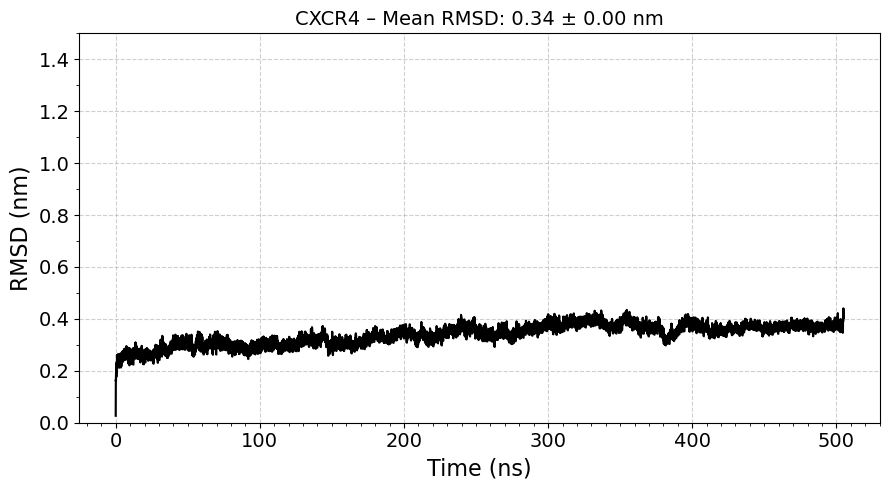

20201


In [542]:
#No jumps
xvg_path = "/Users/farahzainab/Documents/CXCR4-Entf-run2/rmsd_cxcr42.xvg"
label = "CXCR4"
color = "XKCD:black"  # or "XKCD:muted blue"
ylim = (0, 1.5)

# === Load XVG data ===
data = np.loadtxt(xvg_path, comments=["@", "#"])
time = data[:, 0] / 1000  # convert ps to ns
rmsd = data[:, 1]
hi = len(rmsd)

# === Compute stats ===
mean_rmsd = np.mean(rmsd)
sem_rmsd = np.std(rmsd) / np.sqrt(len(rmsd))

# === Plot ===
fig, ax = plt.subplots(figsize=(9, 5))
ax.plot(time, rmsd, color=color, label=label)
ax.fill_between(time, rmsd - sem_rmsd, rmsd + sem_rmsd, alpha=0.3, color=color)

ax.set_xlabel("Time (ns)", fontsize=16)
ax.set_ylabel("RMSD (nm)", fontsize=16)
ax.set_title(f"{label} – Mean RMSD: {mean_rmsd:.2f} ± {sem_rmsd:.2f} nm", fontsize=14)

ax.set_ylim(ylim)

# Ticks and grid
ax.tick_params(axis='both', which='major', labelsize=14)
ax.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
ax.xaxis.set_major_formatter(FormatStrFormatter('%.0f'))
ax.xaxis.set_minor_locator(MultipleLocator(10))
ax.yaxis.set_minor_locator(MultipleLocator(0.1))
ax.grid(True, which='major', linestyle='--', alpha=0.6)

# Legend
#custom_line = [Line2D([0], [0], color=color, lw=2)]
#ax.legend(custom_line, [label], fontsize=14, loc='upper right')

plt.tight_layout()
plt.savefig("cxcr4only-entf_RMSD.png", dpi=300)
plt.show()
print(hi)

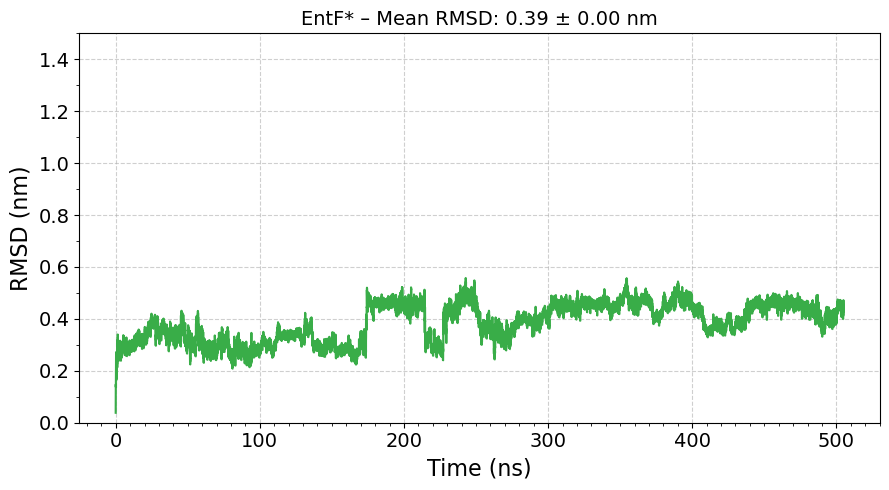

20201


In [551]:
#No jumps
xvg_path = "/Users/farahzainab/Documents/CXCR4-Entf-run2/rmsd_entf2.xvg"
label = "EntF*"
color = "XKCD:medium green"  # or "XKCD:purple"
ylim = (0, 1.5)

# === Load XVG data ===
data = np.loadtxt(xvg_path, comments=["@", "#"])
time = data[:, 0] / 1000  # convert ps to ns
rmsd = data[:, 1]
hi = len(rmsd)

# === Compute stats ===
mean_rmsd = np.mean(rmsd)
sem_rmsd = np.std(rmsd) / np.sqrt(len(rmsd))

# === Plot ===
fig, ax = plt.subplots(figsize=(9, 5))
ax.plot(time, rmsd, color=color, label=label)
ax.fill_between(time, rmsd - sem_rmsd, rmsd + sem_rmsd, alpha=0.3, color=color)

ax.set_xlabel("Time (ns)", fontsize=16)
ax.set_ylabel("RMSD (nm)", fontsize=16)
ax.set_title(f"{label} – Mean RMSD: {mean_rmsd:.2f} ± {sem_rmsd:.2f} nm", fontsize=14)

ax.set_ylim(ylim)

# Ticks and grid
ax.tick_params(axis='both', which='major', labelsize=14)
ax.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
ax.xaxis.set_major_formatter(FormatStrFormatter('%.0f'))
ax.xaxis.set_minor_locator(MultipleLocator(10))
ax.yaxis.set_minor_locator(MultipleLocator(0.1))
ax.grid(True, which='major', linestyle='--', alpha=0.6)

# Legend
#custom_line = [Line2D([0], [0], color=color, lw=2)]
#ax.legend(custom_line, [label], fontsize=14, loc='upper right')

plt.tight_layout()
plt.savefig("cxcr4-entfonly_RMSD.png", dpi=300)
plt.show()
print(hi)

In [ ]:
#3 (CXCR4-Entf*) RMSF

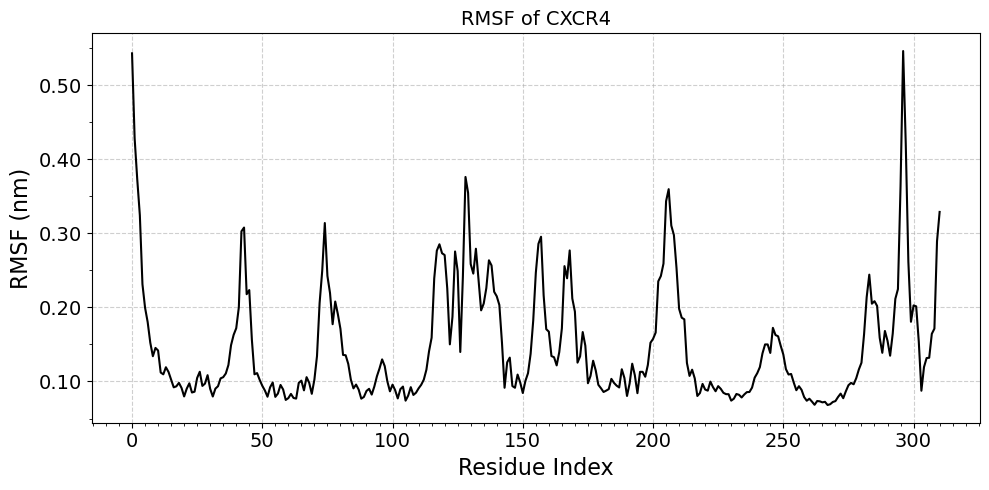

In [547]:
#No jumps
from matplotlib.ticker import MultipleLocator, FormatStrFormatter

# === Path to your single RMSF XVG file ===
xvg_path = "/Users/farahzainab/Documents/CXCR4-Entf-run2/rmsf_cxcr42.xvg"

# === Load data (ignore comments in XVG) ===
data = np.loadtxt(xvg_path, comments=["@", "#"])
residue_indices = np.arange(len(data[:, 0]))  # X-axis as residue index
rmsf = data[:, 1]  # Y-axis is RMSF in nm

# === Plot RMSF ===
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(residue_indices, rmsf, color="XKCD:black") #muted blue

# Axis labels and title
ax.set_xlabel("Residue Index", fontsize=16)
ax.set_ylabel("RMSF (nm)", fontsize=16)
ax.set_title("RMSF of CXCR4", fontsize=14)

# Tick formatting
ax.tick_params(axis='both', which='major', labelsize=14)
ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
ax.xaxis.set_major_formatter(FormatStrFormatter('%d'))
ax.xaxis.set_minor_locator(MultipleLocator(5))
ax.yaxis.set_minor_locator(MultipleLocator(0.05))
ax.grid(True, which='major', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.savefig("cxcr4only-entf_RMSF.png", dpi=300)
plt.show()


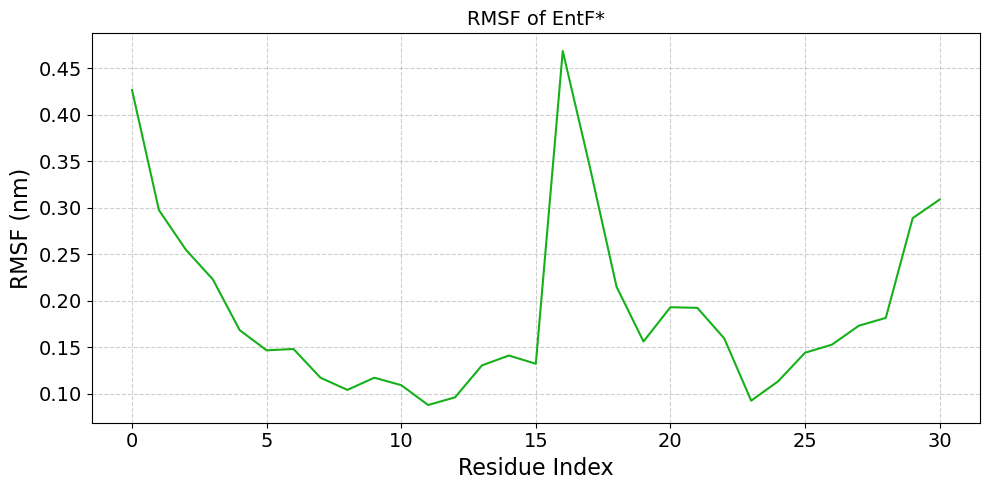

In [548]:
#No jumps
from matplotlib.ticker import MultipleLocator, FormatStrFormatter

# === Path to your single RMSF XVG file ===
xvg_path = "/Users/farahzainab/Documents/CXCR4-Entf-run2/rmsf_entf2.xvg"

# === Load data (ignore comments in XVG) ===
data = np.loadtxt(xvg_path, comments=["@", "#"])
residue_indices = np.arange(len(data[:, 0]))  # X-axis as residue index
rmsf = data[:, 1]  # Y-axis is RMSF in nm

# === Plot RMSF ===
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(residue_indices, rmsf, color="XKCD:green") # or "XKCD:purple"

# Axis labels and title
ax.set_xlabel("Residue Index", fontsize=16)
ax.set_ylabel("RMSF (nm)", fontsize=16)
ax.set_title("RMSF of EntF*", fontsize=14)

# Tick formatting and minor ticks
ax.tick_params(axis='both', which='major', labelsize=14)
ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
ax.xaxis.set_major_formatter(FormatStrFormatter('%d'))
ax.xaxis.set_minor_locator(MultipleLocator(5))
ax.yaxis.set_minor_locator(MultipleLocator(0.05))
ax.grid(True, which='major', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.savefig("cxcr4-entfonly_RMSF.png", dpi=300)
plt.show()


In [ ]:
#RMSD of protein example

In [494]:
#JUST 4 SETS OF SIM3 (CXCR4) RMSD
def plot_rmsd_xvg_files(File_path1, File_name, File_list, File_numbers, skip, Title, ylim):
    palette = ["XKCD:black", "XKCD:vivid blue", "XKCD:green"]
    Name_list = ["CXCR4", "CXCR4-P1", "CXCR4-P2"]
    if skip:
        palette = ["XKCD:vivid blue", "XKCD:green"]
        Name_list = ["P1-CXCR4", "P2-CXCR4"]
    fig, ax = plt.subplots(figsize=(9,5))
        
    for j, (color, (name, simulations)) in enumerate(zip(palette, zip(File_list, File_numbers))):
        all_variables = []
        sim_numbers = [int(sim_num) for sim_num in simulations.split(',')]
        
        for i in sim_numbers:
            filename = os.path.join(File_path1, folder, f"{File_name}{i}.xvg")
            data = np.loadtxt(filename, comments=['#', '@'])
            x = data[:,0]
            y = data[:,1]
            all_variables.append(y)
            
        av_mean = np.mean(np.concatenate(all_variables))
        av_sd = np.std(np.concatenate(all_variables))

        print(f'{name}: mean = {av_mean:5.3f} nm, std = {av_sd:5.3f} nm')

        # Calculate mean and std dev across simulations per time point
        concatenate = np.stack(all_variables, axis=1)
        mean_data = concatenate.mean(axis=1)
        sd_data = concatenate.std(axis=1)

        x = np.arange(len(mean_data))
        y = mean_data
        error = sd_data/2
        ax.plot(x, y, label=f'{Name_list[j]}', color=color)
        ax.fill_between(x, y-error, y+error, alpha=0.3, color=color)

    ax.set_xlabel('Time (ns)', fontsize=20)
    ax.set_ylabel('RMSD (nm)', fontsize=20)
    ax.set_xticklabels(ax.get_xticks(), fontsize=20)
    ax.set_yticks(ticks=np.arange(0.1, 0.8, 0.1), labels=np.arange(0.1, 0.8, 0.1), fontsize=20)

    ax.minorticks_on()
    ax.set_ylim(ylim)
    ax.xaxis.set_minor_locator(MultipleLocator(25))
    ax.yaxis.set_minor_locator(MultipleLocator(0.05))

    ax.tick_params(which='both', width=2)
    ax.tick_params(which='major', direction='inout', length=8)
    ax.tick_params(which='minor', length=4, direction='in')
    plt.rcParams['ytick.left'] = True
    ax.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
    ax.xaxis.set_major_formatter(FormatStrFormatter('%.0f'))
    ax.set_xlim(-10, 505)

    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width * 1, box.height])                                                                  
    ax.legend(bbox_to_anchor=(0.01, 0.87, 0.98, .102), loc='lower left',
              ncols=4, mode="expand", borderaxespad=0., fontsize=18)
   
    plt.ylim(ylim)
    plt.tight_layout()

    if Title:
        save_path = os.path.join(File_path1, f'{Title}_rmsd_plot.png')
        fig.savefig(save_path, dpi=300)
        print(f"Saved RMSD figure: {save_path}")

        plt.show()

In [523]:
########
def plot_individual_rmsd_xvg_files(File_path1, File_name, File_list, Sim_list, Name, Colour, Title, ylim, CName):
    import matplotlib.pyplot as plt
    import matplotlib as mpl
    import numpy as np
    from matplotlib.ticker import MultipleLocator, FormatStrFormatter
    from matplotlib.lines import Line2D
    import os

    fig, ax = plt.subplots(figsize=(9,5))
    
    all_variables = []
    mean_list = []

    # Use colormap from Name
    cmap = mpl.colormaps[CName]
    color = iter(cmap(np.linspace(0.2, 1, len(File_list))))

    # Loop through folders and their respective single sim numbers
    for name, sim_num in zip(File_list, Sim_list):
        # Build filename like: /path/to/folder/rmsd_cxcr4 + sim_num + .xvg
        filename = f"{File_path1}/{name}/{File_name}{sim_num}.xvg"
        
        # Load data
        data = np.loadtxt(filename, comments=['#', '@'])
        x = data[:, 0] / 1000  # Convert ps → ns
        y = data[:,1]
        
        all_variables.append(y)
        
        c = next(color)
        ax.plot(x, y, color=c)
        
        mean = np.mean(y)
        mean_list.append(mean)
        
        # Print mean and std for this dataset
        print(f'{name}: mean = {mean:3f} nm')

    # Calculate overall mean and std from all datasets
    average_std = np.std(mean_list)
    average_mean = np.mean(mean_list)

    print(f'Overall: mean = {average_mean:3f} nm, std = {average_std:3f} nm')

    # Calculate mean and std dev per time point for all loaded y's
    concatenate = np.stack(all_variables, axis=1)
    mean_data = concatenate.mean(axis=1)
    sd_data = concatenate.std(axis=1)
    
        # Add global mean as red dotted line
    ax.axhline(average_mean, linestyle=':', color='red', linewidth=2)

    #time = x
    #error = sd_data/2
    # Plot average line with error bars (optional)
    #ax.plot(x, mean_data, color=Colour, linewidth=2)
    #ax.fill_between(x, mean_data - sd_data/2, mean_data + sd_data/2, color=Colour, alpha=0.3)
    
    #print(f'{name}: mean = {average_mean:5.3f} nm, std = {average_std:5.3f} nm')

    ax.set_xlabel('Time (ns)',fontsize=20)
    ax.set_ylabel('RMSD (nm)',fontsize=20)

    # Format axes
    ax.set_xticks(ax.get_xticks())
    ax.set_xticklabels(ax.get_xticks(), fontsize=19)
    ax.set_yticks(np.arange(0.0, 0.8, 0.5))
    ax.set_yticklabels(np.arange(0.0, 0.8, 0.5), fontsize=19)
    ax.set_ylim(0.1, 0.55)
    ax.set_xlim(-10, 505)
    

    ax.minorticks_on()
    ax.xaxis.set_minor_locator(MultipleLocator(25))
    ax.yaxis.set_minor_locator(MultipleLocator(0.1))
    ax.tick_params(which='both', width=2)
    ax.tick_params(which='major', direction='inout', length=8)
    ax.tick_params(which='minor', length=4, direction="in")
    ax.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
    ax.xaxis.set_major_formatter(FormatStrFormatter('%.0f'))

    # Legend with mean ± std under the Name
    custom_line = [Line2D([0], [0], color=Colour, lw=2)]
    ax.legend(custom_line,
          [f'{Name}\n{average_mean:.2f} ± {average_std:.2f} nm'],
          loc='lower right',
          fontsize=16,
          frameon=False)

    plt.ylim(ylim)
    plt.tight_layout()

    # Save figure in the specified directory
    if Title:
        save_path = os.path.join(File_path1, f'{Title}_indiviual_rmsd_plot.png')
        fig.savefig(save_path, dpi=300)
        print (f"Saved indiviual RMSD figure: {save_path}")
        plt.show()

CXCR4-Entf-run1: mean = 0.330573 nm
CXCR4-Entf-run2: mean = 0.338513 nm
CXCR4-Entf-run3: mean = 0.398668 nm
CXCR4-Entf-run4: mean = 0.348558 nm
Overall: mean = 0.354078 nm, std = 0.026521 nm
Saved indiviual RMSD figure: /Users/farahzainab/Documents/RMSD_protein_average_P2_indiviual_rmsd_plot.png


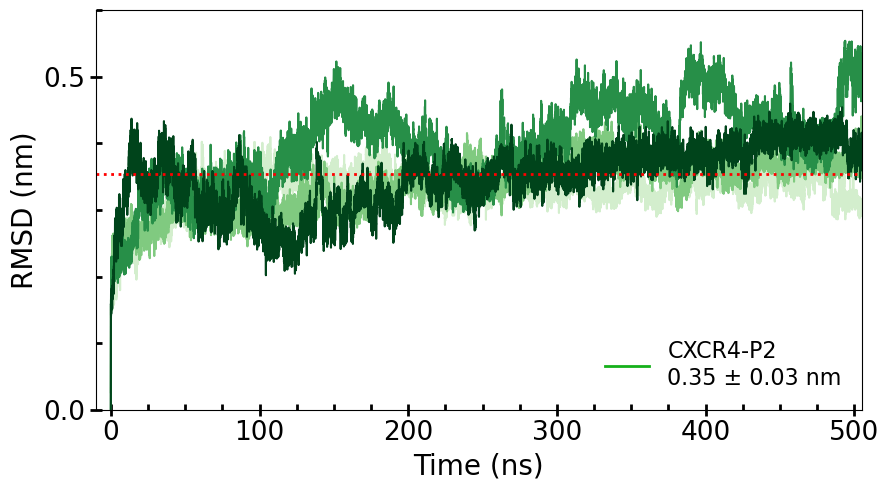

In [524]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
from matplotlib.lines import Line2D
import os

File_path1 = "/Users/farahzainab/Documents"

# You can plot multiple datasets individually by calling the function like this:
File_list = [
    "CXCR4-Entf-run1",
    "CXCR4-Entf-run2",
    "CXCR4-Entf-run3",
    "CXCR4-Entf-run4"]
File_name = "rmsd_cxcr4"
Sim_list = ["1","2","3","4"]          # Simulation runs to include            
Colour = "XKCD:green"   # Color for average plot line
Title = 'RMSD_protein_average_P2'
ylim = (0.0, 0.6)
plot_individual_rmsd_xvg_files(File_path1, File_name, File_list, Sim_list, 
                               Name="CXCR4-P2", Colour = Colour, Title=Title, ylim=ylim, CName='Greens')

In [525]:
#JUST 4 SETS OF SIM2 (CXCR4) RMSD

CXCR4-CXCL12-run2: mean = 0.331146 nm
CXCR4-CXCL12-run3: mean = 0.266211 nm
CXCR4-CXCL12-run4: mean = 0.304921 nm
CXCR4-CXCL12-run5: mean = 0.287058 nm
Overall: mean = 0.297334 nm, std = 0.023849 nm
Saved indiviual RMSD figure: /Users/farahzainab/Documents/RMSD_protein_average_P1_indiviual_rmsd_plot.png


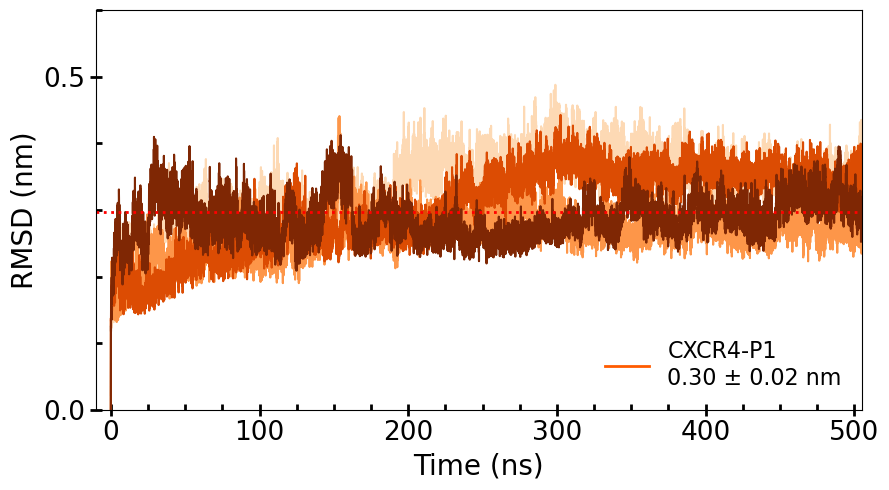

In [526]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
from matplotlib.lines import Line2D

File_path1 = "/Users/farahzainab/Documents"

# You can plot multiple datasets individually by calling the function like this:
File_list = [
    "CXCR4-CXCL12-run2",
    "CXCR4-CXCL12-run3",
    "CXCR4-CXCL12-run4",
    "CXCR4-CXCL12-run5"]
File_name = "rmsd_cxcr4"
Sim_list = ["2","3","4","5"]          # Simulation runs to include            
Colour = "XKCD:bright orange"   # Color for average plot line
Title = 'RMSD_protein_average_P1'
ylim = (0.0, 0.6)
plot_individual_rmsd_xvg_files(File_path1, File_name, File_list, Sim_list, 
                               Name="CXCR4-P1", Colour = Colour, Title=Title, ylim=ylim, CName='Oranges')

cxcr4-2nd: mean = 0.336983 nm
cxcr4-3rd: mean = 0.246394 nm
cxcr4-4th: mean = 0.294323 nm
cxcr4-5th: mean = 0.230617 nm
Overall: mean = 0.277079 nm, std = 0.041791 nm
Saved indiviual RMSD figure: /Users/farahzainab/Documents/RMSD_protein_average_CXCR4_indiviual_rmsd_plot.png


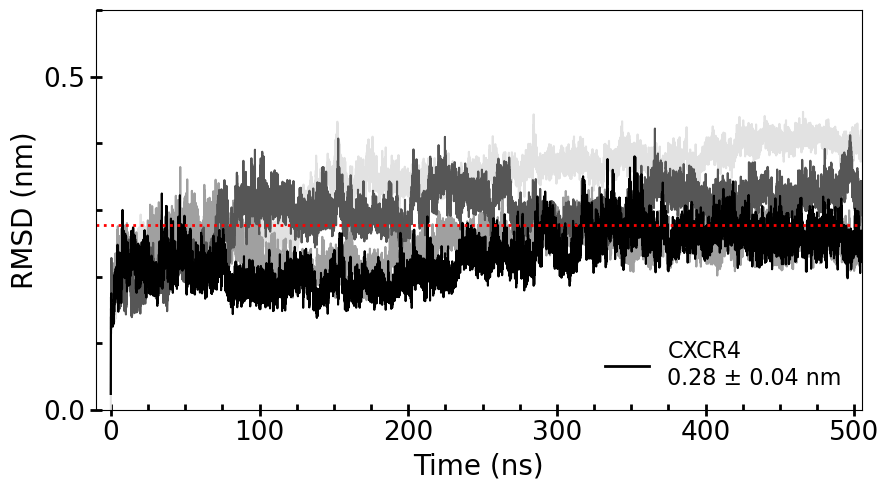

In [504]:
#JUST 4 SETS OF SIM1 (CXCR4) RMSD 1
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
from matplotlib.lines import Line2D

File_path1 = "/Users/farahzainab/Documents"

# You can plot multiple datasets individually by calling the function like this:
File_list = [
    "cxcr4-2nd",
    "cxcr4-3rd",
    "cxcr4-4th",
    "cxcr4-5th"]
File_name = "rmsd_cxcr4"
Sim_list = ["2","3","4","5"]          # Simulation runs to include            
Colour = "XKCD:Black"   # Color for average plot line
Title = 'RMSD_protein_average_CXCR4'
ylim = (0.0, 0.6)
plot_individual_rmsd_xvg_files(File_path1, File_name, File_list, Sim_list, 
                               Name="CXCR4", Colour = Colour, Title=Title, ylim=ylim, CName='Greys')

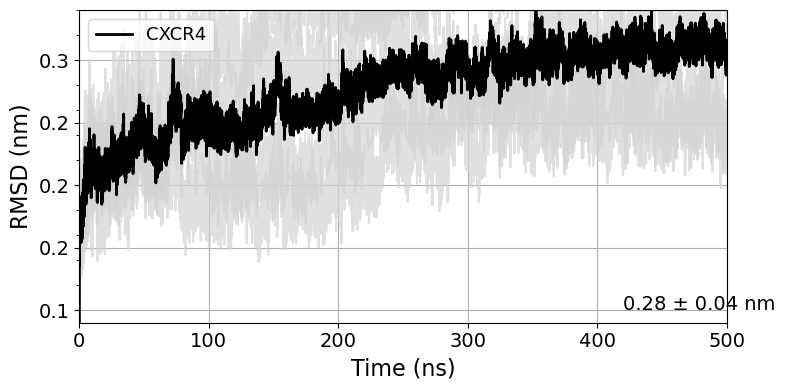

CXCR4: mean = 0.277 nm, SD = 0.042 nm


In [505]:
#JUST 4 SETS OF SIM1 (CXCR4) RMSD 2
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
from matplotlib.lines import Line2D
import os
import glob

# === CONFIGURATION ===
base_path = "/Users/farahzainab/Documents/"
folders = ["cxcr4-2nd", "cxcr4-3rd", "cxcr4-4th", "cxcr4-5th"]
file_prefix = "rmsd_"
label = "CXCR4"
color = "black"
ylim = (0.09, 0.34)

# === LOAD DATA ===
all_rmsds = []
times = None

for folder in folders:
    folder_path = os.path.join(base_path, folder)
    xvg_files = glob.glob(os.path.join(folder_path, file_prefix + "*.xvg"))
    if not xvg_files:
        print(f"⚠️ No file starting with '{file_prefix}' found in {folder}")
        continue
    file_path = xvg_files[0]  # pick the first match
    data = np.loadtxt(file_path, comments=["@", "#"])
    time = data[:, 0] / 1000  # convert to ns
    rmsd = data[:, 1]
    if times is None:
        times = time
    all_rmsds.append(rmsd)

# === CALCULATE MEAN, SEM ===
all_rmsds = np.array(all_rmsds)
mean_rmsd = np.mean(all_rmsds, axis=0)
std_rmsd = np.std(all_rmsds, axis=0)
sem_rmsd = std_rmsd / np.sqrt(len(all_rmsds))

overall_mean = np.mean(mean_rmsd)
overall_sd = np.std([np.mean(x) for x in all_rmsds])  # ← use SD, not SEM

# === PLOTTING ===
fig, ax = plt.subplots(figsize=(8, 4))

# Plot individual runs in grey
for rmsd in all_rmsds:
    ax.plot(times, rmsd, color="lightgrey", alpha=0.7)

# Plot average in black
ax.plot(times, mean_rmsd, color=color, label=label, linewidth=2)

# Axis settings
ax.set_xlabel("Time (ns)", fontsize=16)
ax.set_ylabel("RMSD (nm)", fontsize=16)
ax.set_ylim(ylim)
ax.set_xlim(0, 500)

# Formatting
ax.set_xticks(np.arange(0, 501, 100))
ax.tick_params(axis='both', labelsize=14)
ax.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
ax.xaxis.set_major_formatter(FormatStrFormatter('%.0f'))
ax.yaxis.set_minor_locator(MultipleLocator(0.02))
ax.grid(True)

# Add mean ± SD text on the plot
text = f"{overall_mean:.2f} ± {overall_sd:.2f} nm"
ax.text(420, ylim[0] + 0.01, text, fontsize=14, color=color)

# Legend
custom_line = [Line2D([0], [0], color=color, lw=2)]
ax.legend(custom_line, [label], fontsize=13, loc="upper left")

plt.tight_layout()
#plt.savefig("CXCR4_RMSD_avg.png", dpi=300)
plt.show()

# Print stats
print(f"CXCR4: mean = {overall_mean:.3f} nm, SD = {overall_sd:.3f} nm")


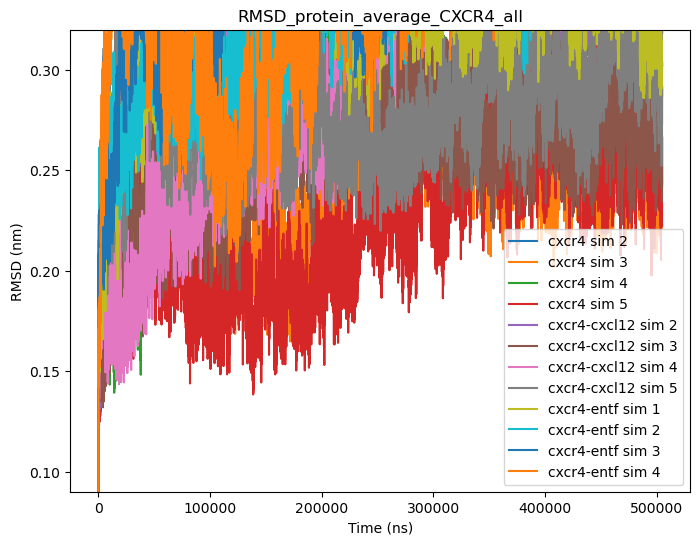

In [508]:
#RMSD of protein all averages

import os
import numpy as np
import matplotlib.pyplot as plt

base_path = loc + File_path2

plt.figure(figsize=(8,6))

for idx, folder in enumerate(File_list):
    sim_nums = Sim_list[idx].split(',')
    for sim_num in sim_nums:
        filename = os.path.join(base_path, folder, f"{File_name}{sim_num}.xvg")
        data = np.loadtxt(filename, comments=['#', '@'])
        x, y = data[:,0], data[:,1]
        plt.plot(x, y, label=f"{folder} sim {sim_num}")

plt.title(Title)
plt.ylim(ylim)
plt.xlabel('Time (ns)')  # or whatever x axis label
plt.ylabel('RMSD (nm)')  # or whatever y axis label
plt.legend()
plt.show()


cxcr4: mean = 0.277 nm, std = 0.062 nm


/var/folders/x1/ztrlfvq52tb0n7k1rt95bl0c0000gp/T/ipykernel_41400/109031827.py:39: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticks(), fontsize=20)


Saved RMSD figure: /Users/farahzainab/Documents/RMSD_Proteinall/RMSD_protein_average_CXCR4_all_rmsd_plot.png


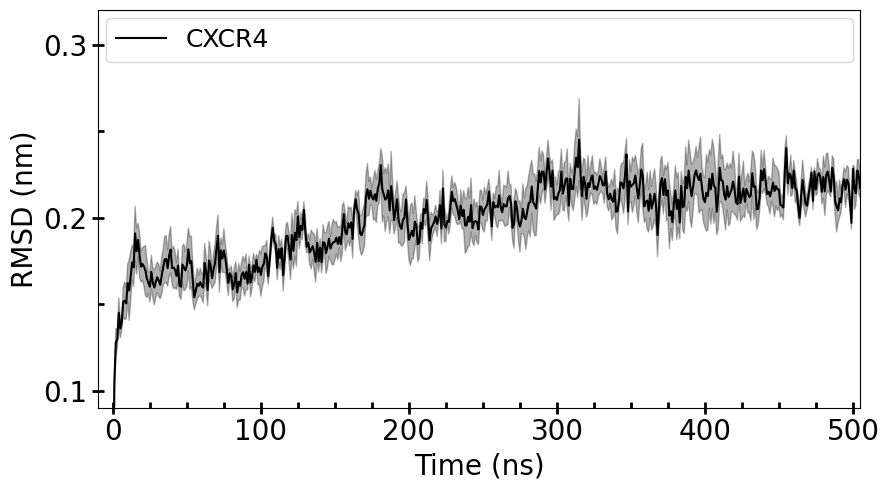

cxcr4-cxcl12: mean = 0.297 nm, std = 0.053 nm
cxcr4-entf: mean = 0.354 nm, std = 0.055 nm


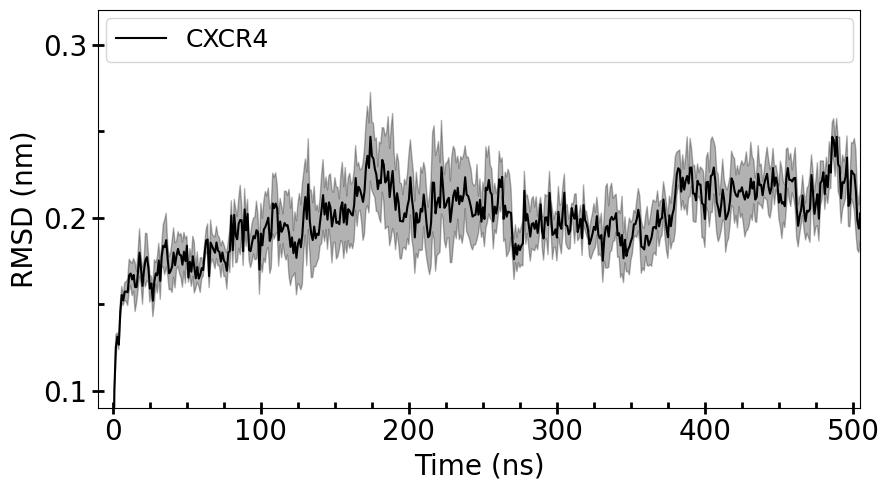

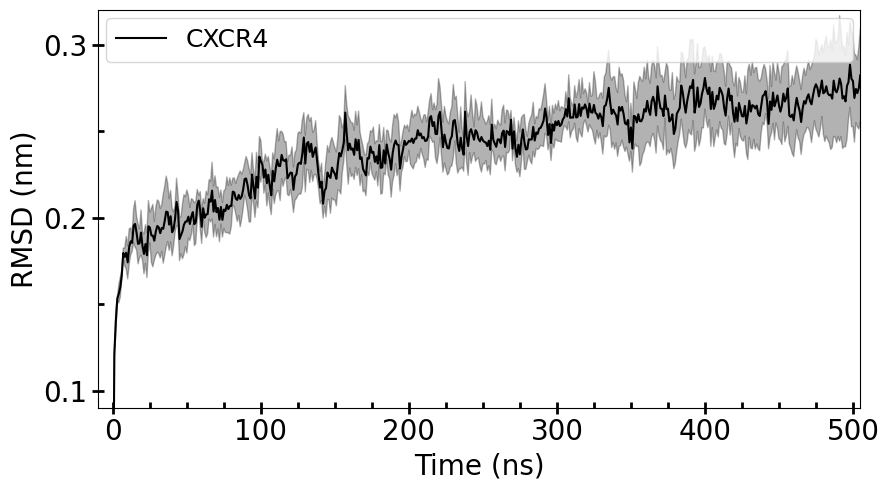

In [507]:
# Your base paths
loc = "/Users/farahzainab/Documents/"
File_path2 = "RMSD_Proteinall"
File_name = "rmsd_cxcr4"
File_list = ["cxcr4", "cxcr4-cxcl12", "cxcr4-entf"]
Sim_list = ["2,3,4,5", "2,3,4,5", "1,2,3,4"]
Title = "RMSD_protein_average_CXCR4_all"
ylim = (0.09, 0.32)

# Compose base path without folder (because your function adds folder)
base_path = loc + File_path2  # e.g. "/Users/farahzainab/Documents/RMSD_Proteinall"

# Call your plotting function for each folder, pass base_path and let function add folder
for i, folder in enumerate(File_list):
    plot_rmsd_xvg_files(base_path, File_name, [folder], [Sim_list[i]], skip=False, Title=Title if i == 0 else None, ylim=ylim)


In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt

base_path = loc + File_path2

plt.figure(figsize=(8, 6))

for idx, folder in enumerate(File_list):
    sim_nums = Sim_list[idx].split(',')  # assuming Sim_list is list of strings like "2,3,4,5"
    all_y = []
    x = None

    for sim_num in sim_nums:
        filename = os.path.join(base_path, folder, f"{File_name}{sim_num}.xvg")
        data = np.loadtxt(filename, comments=['#', '@'])
        if x is None:
            x = data[:, 0] / 1000.0  # Convert ps to ns
        all_y.append(data[:, 1])

    all_y = np.array(all_y)
    mean_y = np.mean(all_y, axis=0)
    # std_y = np.std(all_y, axis=0)  # Not used now since no shading

    # Plot mean line only (no shading)
    plt.plot(x, mean_y, label=folder)

plt.title(Title, fontsize=20)
plt.ylim(ylim)
plt.xlabel('Time (ns)', fontsize=20)
plt.ylabel('RMSD (nm)', fontsize=20)
plt.legend(fontsize=20)
plt.yticks(np.arange(0.1, 0.61, 0.1), fontsize=20)
plt.xticks(fontsize=20)
plt.grid(True, linestyle='--', alpha=0.5)  # subtle grid for readability
plt.tight_layout()
plt.show()

In [ ]:
#RMSD of peptide all averages

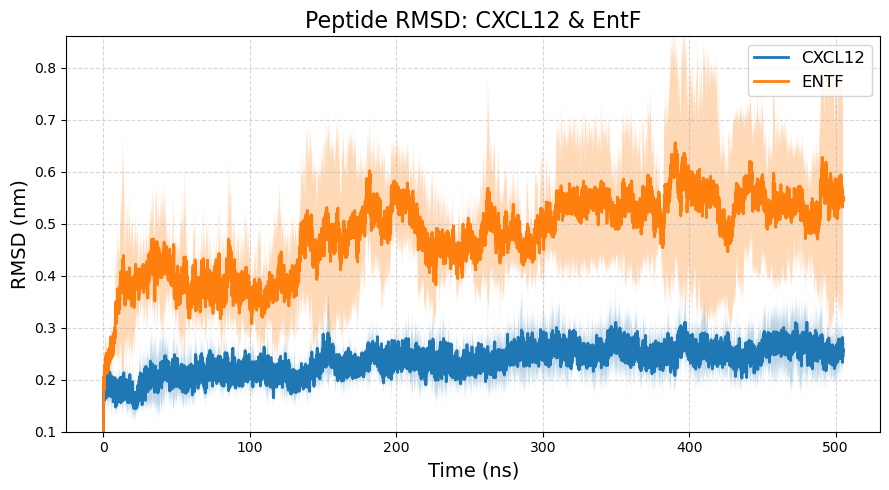

In [568]:
import os
import numpy as np
import matplotlib.pyplot as plt

# Base directory
base_path = "/Users/farahzainab/Documents/RMSD_Peptidesall"

# Peptides, folders, and sim info
peptides = ["cxcl12", "entf"]
folders = ["cxcr4-cxcl12", "cxcr4-entf"]
sim_lists = ["2,3,4,5", "1,2,3,4"]
file_prefix = "rmsd_"  # filenames like rmsd_cxcl122.xvg

# Set up plot
plt.figure(figsize=(9, 5))

# Loop through peptides and plot
for idx, (pep, folder, sim_str) in enumerate(zip(peptides, folders, sim_lists)):
    sim_nums = sim_str.split(',')
    all_y = []
    x = None

    for sim_num in sim_nums:
        filename = os.path.join(base_path, folder, f"{file_prefix}{pep}{sim_num}.xvg")
        data = np.loadtxt(filename, comments=['#', '@'])
        
        if x is None:
            x = data[:, 0] / 1000.0  # Convert ps → ns
        
        all_y.append(data[:, 1])

    all_y = np.array(all_y)
    mean_y = np.mean(all_y, axis=0)
    std_y = np.std(all_y, axis=0)

    plt.plot(x, mean_y, label=pep.upper(), linewidth=2)
    plt.fill_between(x, mean_y - std_y, mean_y + std_y, alpha=0.3)

# Formatting
plt.xlabel("Time (ns)", fontsize=14)
plt.ylabel("RMSD (nm)", fontsize=14)
plt.ylim(0.1, 0.86)
plt.yticks(np.arange(0.1, 0.86, 0.1))
plt.title("Peptide RMSD: CXCL12 & EntF*", fontsize=16)
plt.legend(fontsize=12)
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

CXCR4-Entf-run1: mean = 0.404666 nm
CXCR4-Entf-run2: mean = 0.386333 nm
CXCR4-Entf-run3: mean = 0.606511 nm
CXCR4-Entf-run4: mean = 0.514038 nm
Overall: mean = 0.477887 nm, std = 0.088874 nm
Saved indiviual RMSD figure: /Users/farahzainab/Documents/RMSD_peptide_average_P2_indiviual_rmsd_plot.png


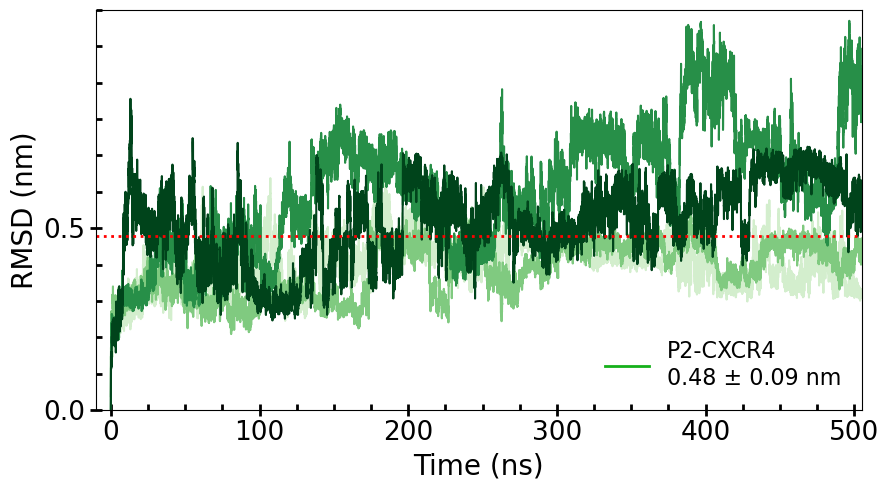

In [546]:
#Just 4 sets of SIM3 (Entf*)P2 RMSD
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
from matplotlib.lines import Line2D

File_path1 = "/Users/farahzainab/Documents"

# You can plot multiple datasets individually by calling the function like this:
File_list = [
    "CXCR4-Entf-run1",
    "CXCR4-Entf-run2",
    "CXCR4-Entf-run3",
    "CXCR4-Entf-run4"]
File_name = "rmsd_entf"
Sim_list = ["1","2","3","4"]          # Simulation runs to include            
Colour = "XKCD:green"   # Color for average plot line
Title = 'RMSD_peptide_average_P2'
ylim = (0.0, 1.1) 
plot_individual_rmsd_xvg_files(File_path1, File_name, File_list, Sim_list, 
                               Name="P2-CXCR4", Colour = Colour, Title=Title, ylim=ylim, CName='Greens')

CXCR4-CXCL12-run2: mean = 0.258155 nm
CXCR4-CXCL12-run3: mean = 0.210815 nm
CXCR4-CXCL12-run4: mean = 0.232726 nm
CXCR4-CXCL12-run5: mean = 0.240101 nm
Overall: mean = 0.235449 nm, std = 0.016967 nm
Saved indiviual RMSD figure: /Users/farahzainab/Documents/RMSD_peptide_average_P1_indiviual_rmsd_plot.png


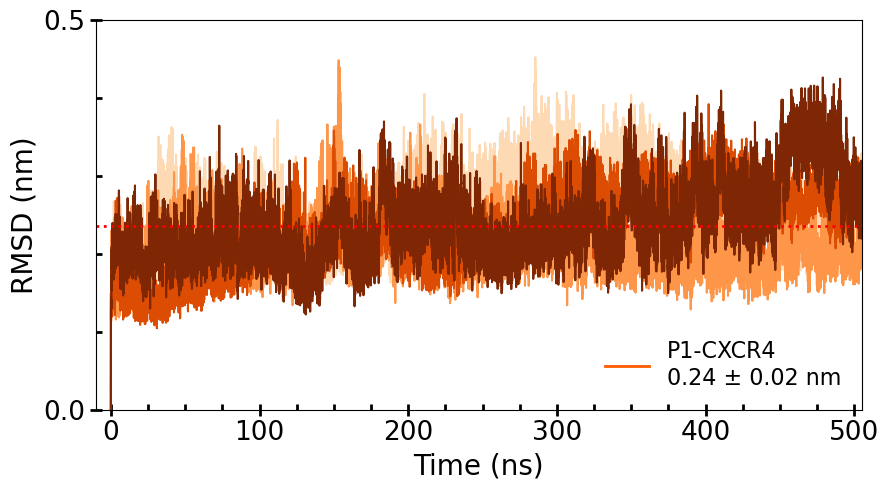

In [529]:
#Just 4 sets of SIM2 (CXCL12)P1 RMSD
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
from matplotlib.lines import Line2D

File_path1 = "/Users/farahzainab/Documents"

# You can plot multiple datasets individually by calling the function like this:
File_list = [
    "CXCR4-CXCL12-run2",
    "CXCR4-CXCL12-run3",
    "CXCR4-CXCL12-run4",
    "CXCR4-CXCL12-run5"]
File_name = "rmsd_cxcl12"
Sim_list = ["2","3","4","5"]          # Simulation runs to include            
Colour = "XKCD:bright orange"   # Color for average plot line
Title = 'RMSD_peptide_average_P1'
ylim = (0.0, 0.5)
plot_individual_rmsd_xvg_files(File_path1, File_name, File_list, Sim_list, 
                               Name="P1-CXCR4", Colour = Colour, Title=Title, ylim=ylim, CName='Oranges')


In [ ]:
#RMSF plots

Saved plot to: /Users/farahzainab/Documents/RMSF_CXCR4alone/rmsf_cxcr4_combined_plot.png


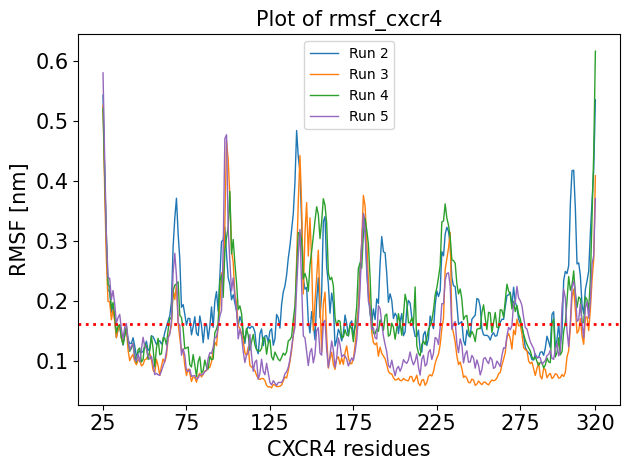

<Figure size 640x480 with 0 Axes>

In [472]:
import numpy as np
import matplotlib.pyplot as plt

def plot_xvg_files(file_names, file_numbers, base_file_name):

    colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#9467bd']
  # 4 colors for 4 runs
    
    for file_name in file_names:
        all_variables = []

        for idx, file_number in enumerate(file_numbers):
            full_file_name = base_file_name + file_name + str(file_number) + '.xvg'

            # Load data, ignoring lines starting with '#' or '@'
            data = np.loadtxt(full_file_name, comments=['#', '@'])

            x = np.arange(len(data[:, 0]))
            y = data[:, 1]
            all_variables.append(y)

            # Plot individual lines with assigned color
            plt.plot(x, y, label=f'Run {file_number}', color=colors[idx], linewidth=1)

        # Calculate global mean from all runs combined
        combined_data = np.concatenate(all_variables)
        global_mean = combined_data.mean()

        # Add global mean as a dotted red horizontal line
        plt.axhline(global_mean, color='red', linestyle=':', linewidth=2)

        # Set labels, title, ticks
        plt.xlabel('CXCR4 residues', fontsize=15)
        plt.ylabel('RMSF [nm]', fontsize=15)
        plt.title(f'Plot of {file_name}', fontsize=15)
        plt.xticks(fontsize=15, ticks=[0, 50, 100, 150, 200, 250, 295], labels=[25, 75, 125, 175, 225, 275, 320])
        plt.yticks(fontsize=15)

        # Show legend
        plt.legend()

        # Save plot before showing
        save_path = base_file_name + f"{file_name}_combined_plot.png"
        plt.tight_layout()
        plt.savefig(save_path, dpi=300)
        print(f"Saved plot to: {save_path}")

        # Display the plot
        plt.show()

        # Clear figure for next plot if multiple files
        plt.clf()


# Example usage
loc = '/Users/farahzainab/Documents/'
file_names = ['rmsf_cxcr4']
file_numbers = [2, 3, 4, 5]
base_file_name = f"{loc}RMSF_CXCR4alone/"
plot_xvg_files(file_names, file_numbers, base_file_name)


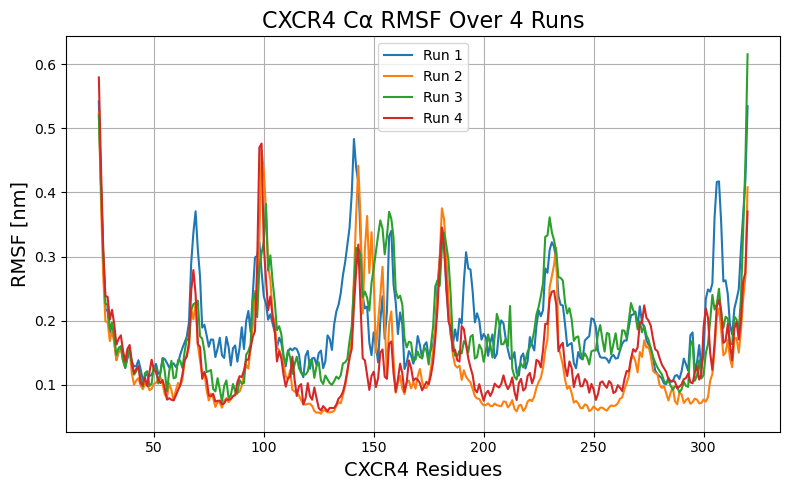

In [99]:
#JUST 4 SETS OF SIM1 (CXCR4) RMSF 2
import numpy as np
import matplotlib.pyplot as plt
import os
import glob

# === CONFIGURATION ===
base_path = "/Users/farahzainab/Documents/"
folders = ["cxcr4-2nd", "cxcr4-3rd", "cxcr4-4th", "cxcr4-5th"]
file_prefix = "rmsf_"
title = "CXCR4 Cα RMSF Over 4 Runs"
ylabel = "RMSF [nm]"
xlabel = "CXCR4 Residues"

# === LOAD AND PLOT ===
plt.figure(figsize=(8, 5))
for i, folder in enumerate(folders, start=1):
    folder_path = os.path.join(base_path, folder)
    xvg_files = glob.glob(os.path.join(folder_path, file_prefix + "*.xvg"))
    if not xvg_files:
        print(f"⚠️ No file starting with '{file_prefix}' found in {folder}")
        continue
    file_path = xvg_files[0]  # use first matching file
    data = np.loadtxt(file_path, comments=["@", "#"])
    residue = data[:, 0]
    rmsf = data[:, 1]
    plt.plot(residue, rmsf, label=f"Run {i}")

# === PLOT DECORATION ===
plt.xlabel(xlabel, fontsize=14)
plt.ylabel(ylabel, fontsize=14)
plt.title(title, fontsize=16)
plt.legend()
plt.grid(True)
plt.tight_layout()
#plt.savefig("CXCR4_RMSF_runs.png", dpi=300)
plt.show()
plt.savefig('/Users/farahzainab/Documents/rmsf_plot_cxcr4alone.png')


In [ ]:
#RMSF TOTAL + MEAN + STD

Loading /Users/farahzainab/Documents/RMSF_CXCR4all/cxcr4/rmsf_cxcr42.xvg
Loaded /Users/farahzainab/Documents/RMSF_CXCR4all/cxcr4/rmsf_cxcr42.xvg with shape (296, 1)
Loading /Users/farahzainab/Documents/RMSF_CXCR4all/cxcr4/rmsf_cxcr43.xvg
Loaded /Users/farahzainab/Documents/RMSF_CXCR4all/cxcr4/rmsf_cxcr43.xvg with shape (296, 1)
Loading /Users/farahzainab/Documents/RMSF_CXCR4all/cxcr4/rmsf_cxcr44.xvg
Loaded /Users/farahzainab/Documents/RMSF_CXCR4all/cxcr4/rmsf_cxcr44.xvg with shape (296, 1)
Loading /Users/farahzainab/Documents/RMSF_CXCR4all/cxcr4/rmsf_cxcr45.xvg
Loaded /Users/farahzainab/Documents/RMSF_CXCR4all/cxcr4/rmsf_cxcr45.xvg with shape (296, 1)
Loading /Users/farahzainab/Documents/RMSF_CXCR4all/cxcr4-cxcl12/rmsf_cxcr42.xvg
Loaded /Users/farahzainab/Documents/RMSF_CXCR4all/cxcr4-cxcl12/rmsf_cxcr42.xvg with shape (335, 1)
Loading /Users/farahzainab/Documents/RMSF_CXCR4all/cxcr4-cxcl12/rmsf_cxcr43.xvg
Loaded /Users/farahzainab/Documents/RMSF_CXCR4all/cxcr4-cxcl12/rmsf_cxcr43.xvg wi

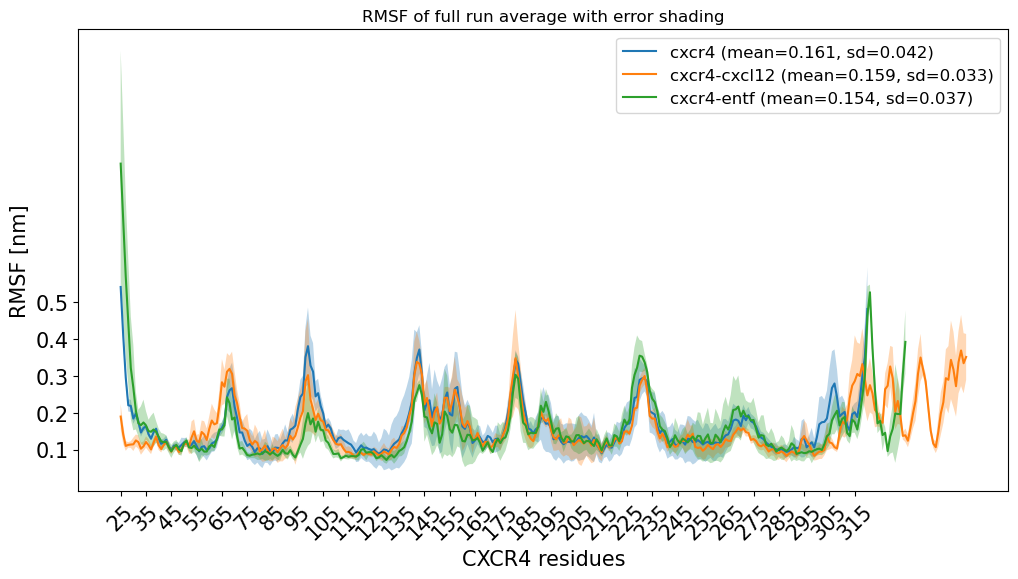

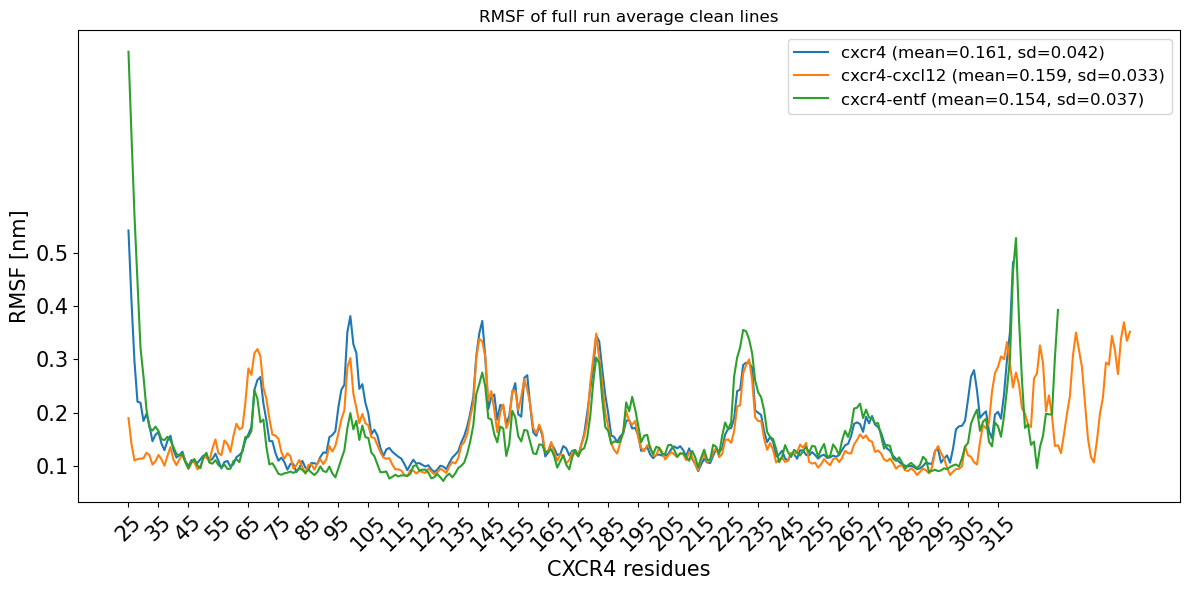

In [398]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

# Define paths and file patterns
loc = "/Users/farahzainab/Documents/"
File_path1 = os.path.join(loc, "RMSF_CXCR4all")
File_names = "rmsf_cxcr4"
File_list = ["cxcr4", "cxcr4-cxcl12", "cxcr4-entf"]
Sim_list = [
    [2, 3, 4, 5],
    [2, 3, 4, 5],
    [1, 2, 3, 4]
]

# Residue labels (assuming residues 25 to 320 inclusive)
label_protein = [str(i) for i in range(25, 321)]  # 296 labels

# Prepare figures for plotting
plt.figure(1, figsize=(12, 6))
plt.title('RMSF of full run average with error shading')
plt.xlabel('CXCR4 residues', fontsize=15)
plt.ylabel('RMSF [nm]', fontsize=15)
plt.xticks(fontsize=15, ticks=np.arange(0, len(label_protein), 10), labels=label_protein[::10], rotation=45)
plt.yticks(fontsize=15, ticks=[0.1, 0.2, 0.3, 0.4, 0.5])

plt.figure(2, figsize=(12, 6))
plt.title('RMSF of full run average clean lines')
plt.xlabel('CXCR4 residues', fontsize=15)
plt.ylabel('RMSF [nm]', fontsize=15)
plt.xticks(fontsize=15, ticks=np.arange(0, len(label_protein), 10), labels=label_protein[::10], rotation=45)
plt.yticks(fontsize=15, ticks=[0.1, 0.2, 0.3, 0.4, 0.5])

for name, sim_numbers in zip(File_list, Sim_list):
    file_data = []

    for i in sim_numbers:
        filename = os.path.join(File_path1, name, f"{File_names}{i}.xvg")
        try:
            print(f"Loading {filename}")
            # Read file, skip lines starting with '#' or '@'
            # pandas read_csv only accepts a single char for comment, so we filter manually
            with open(filename, 'r') as f:
                lines = [line for line in f if not (line.startswith('#') or line.startswith('@'))]

            # Now read filtered data into DataFrame
            from io import StringIO
            data_str = "".join(lines)
            df = pd.read_csv(StringIO(data_str), delim_whitespace=True, header=None, usecols=[1])

            file_data.append(df)
            print(f"Loaded {filename} with shape {df.shape}")

        except FileNotFoundError:
            print(f"File not found: {filename}")
            continue

    if not file_data:
        print(f"No data found for {name}")
        continue

    # Concatenate all simulation data horizontally (columns are different runs)
    concatenate = pd.concat(file_data, axis=1)
    mean_data = concatenate.mean(axis=1)
    sd_data = concatenate.std(axis=1)

    av_mean = mean_data.mean()
    av_sd = sd_data.mean()

    x = np.arange(len(mean_data))
    y = mean_data.values
    error = sd_data.values

    # Plot mean + shaded error
    plt.figure(1)
    plt.plot(x, y, label=f"{name} (mean={av_mean:.3f}, sd={av_sd:.3f})")
    plt.fill_between(x, y - error, y + error, alpha=0.3)

    # Plot clean lines only
    plt.figure(2)
    plt.plot(x, y, label=f"{name} (mean={av_mean:.3f}, sd={av_sd:.3f})")

# Add legends
plt.figure(1)
plt.legend(fontsize=12, loc='upper right')

plt.figure(2)
plt.legend(fontsize=12, loc='upper right')

plt.tight_layout()
plt.show()


Loading /Users/farahzainab/Documents/RMSF_CXCR4all/cxcr4/rmsf_cxcr42.xvg
Loaded /Users/farahzainab/Documents/RMSF_CXCR4all/cxcr4/rmsf_cxcr42.xvg with shape (296, 1)
Loading /Users/farahzainab/Documents/RMSF_CXCR4all/cxcr4/rmsf_cxcr43.xvg
Loaded /Users/farahzainab/Documents/RMSF_CXCR4all/cxcr4/rmsf_cxcr43.xvg with shape (296, 1)
Loading /Users/farahzainab/Documents/RMSF_CXCR4all/cxcr4/rmsf_cxcr44.xvg
Loaded /Users/farahzainab/Documents/RMSF_CXCR4all/cxcr4/rmsf_cxcr44.xvg with shape (296, 1)
Loading /Users/farahzainab/Documents/RMSF_CXCR4all/cxcr4/rmsf_cxcr45.xvg
Loaded /Users/farahzainab/Documents/RMSF_CXCR4all/cxcr4/rmsf_cxcr45.xvg with shape (296, 1)
Loading /Users/farahzainab/Documents/RMSF_CXCR4all/cxcr4-cxcl12/rmsf_cxcr42.xvg
Loaded /Users/farahzainab/Documents/RMSF_CXCR4all/cxcr4-cxcl12/rmsf_cxcr42.xvg with shape (335, 1)
Loading /Users/farahzainab/Documents/RMSF_CXCR4all/cxcr4-cxcl12/rmsf_cxcr43.xvg
Loaded /Users/farahzainab/Documents/RMSF_CXCR4all/cxcr4-cxcl12/rmsf_cxcr43.xvg wi

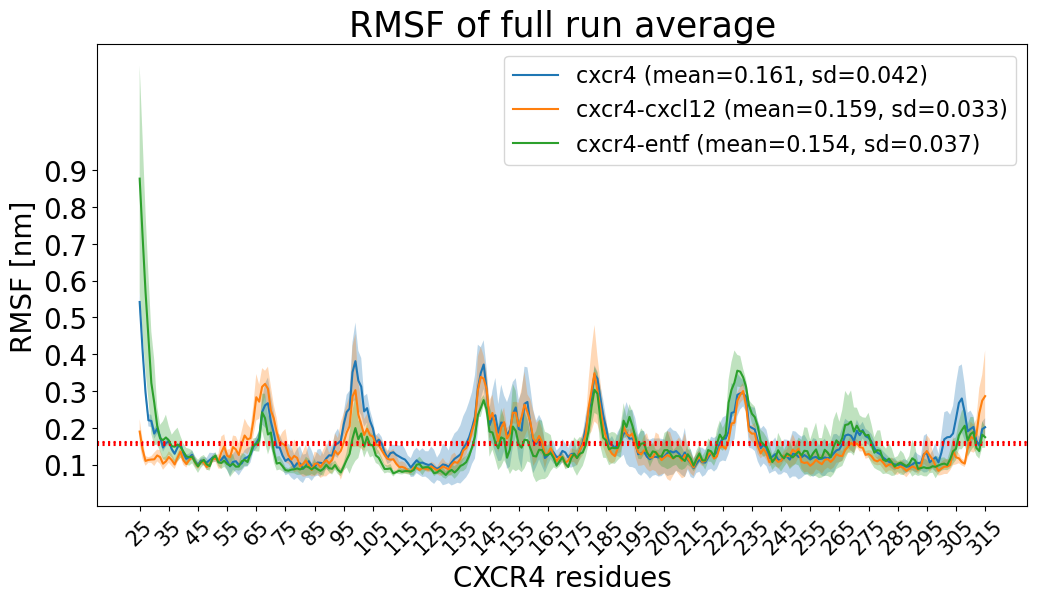

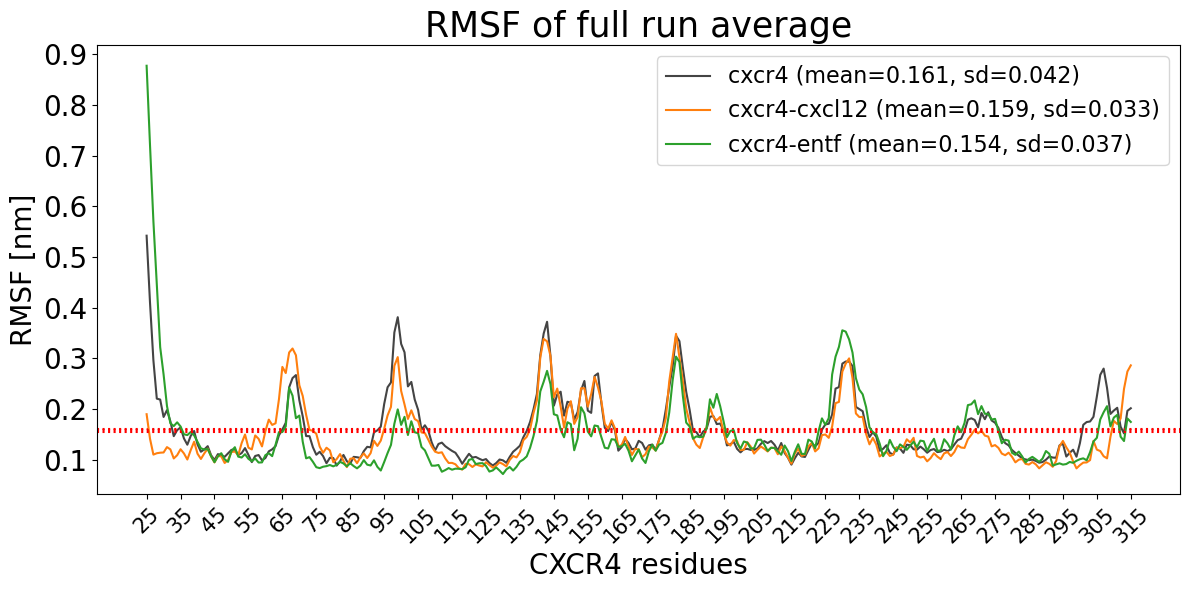

In [569]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

# Define paths and file patterns
loc = "/Users/farahzainab/Documents/"
File_path1 = os.path.join(loc, "RMSF_CXCR4all")
File_names = "rmsf_cxcr4"
File_list = ["cxcr4", "cxcr4-cxcl12", "cxcr4-entf"]
Sim_list = [
    [2, 3, 4, 5],
    [2, 3, 4, 5],
    [1, 2, 3, 4]
]

# Residue labels (assuming residues 25 to 320 inclusive)
label_protein = [str(i) for i in range(25, 321)]  # 296 labels

# Prepare figures for plotting
plt.figure(1, figsize=(12, 6))
plt.title('RMSF of full run average', fontsize=25)
plt.xlabel('CXCR4 residues', fontsize=20)
plt.ylabel('RMSF [nm]', fontsize=20)
plt.xticks(fontsize=20, ticks=np.arange(0, len(label_protein), 10), labels=label_protein[::10], rotation=45)
plt.yticks(fontsize=20, ticks=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

plt.figure(2, figsize=(12, 6))
plt.title('RMSF of full run average', fontsize=25)
plt.xlabel('CXCR4 residues', fontsize=20)
plt.ylabel('RMSF [nm]', fontsize=20)
plt.xticks(fontsize=20, ticks=np.arange(0, len(label_protein), 10), labels=label_protein[::10], rotation=45)
plt.yticks(fontsize=20, ticks=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

color_map = {
    "cxcr4": "#444444",
    "cxcr4-cxcl12": "#ff7f0e",  # orange
    "cxcr4-entf": "#2ca02c"     # green
}

for name, sim_numbers in zip(File_list, Sim_list):
    file_data = []
    all_data_for_global_mean = []

    for i in sim_numbers:
        filename = os.path.join(File_path1, name, f"{File_names}{i}.xvg")
        try:
            print(f"Loading {filename}")
            # Read file, skip lines starting with '#' or '@'
            # pandas read_csv only accepts a single char for comment, so we filter manually
            with open(filename, 'r') as f:
                lines = [line for line in f if not (line.startswith('#') or line.startswith('@'))]

            # Now read filtered data into DataFrame
            from io import StringIO
            data_str = "".join(lines)
            df = pd.read_csv(StringIO(data_str), delim_whitespace=True, header=None, usecols=[1])

            file_data.append(df)
            print(f"Loaded {filename} with shape {df.shape}")

        except FileNotFoundError:
            print(f"File not found: {filename}")
            continue

    if not file_data:
        print(f"No data found for {name}")
        continue

    # Concatenate all simulation data horizontally (columns are different runs)
    concatenate = pd.concat(file_data, axis=1)
    mean_data = concatenate.mean(axis=1)
    sd_data = concatenate.std(axis=1)

    av_mean = mean_data.mean()
    av_sd = sd_data.mean()

        # ... after mean_data, sd_data calculation ...

    x = np.arange(len(mean_data))
    y = mean_data.values
    error = sd_data.values

    all_data_for_global_mean.append(mean_data)
    # Combine all mean data from each system
    combined_mean_data = pd.concat(all_data_for_global_mean, axis=0)
    global_mean = combined_mean_data.mean()


    # Limit plotting to residues up to 315
    max_residue = 315
    max_index = max_residue - 25  # because residue numbering starts at 25
    x = x[:max_index+1]
    y = y[:max_index+1]
    error = error[:max_index+1]

    # Limit label_protein for x-axis
    label_protein_limited = label_protein[:max_index+1]

    # Plot mean + shaded error
    plt.figure(1)
    plt.plot(x, y, label=f"{name} (mean={av_mean:.3f}, sd={av_sd:.3f})")
    plt.fill_between(x, y - error, y + error, alpha=0.3)
    plt.axhline(global_mean, linestyle=':', color='red')

    # Plot clean lines only
    plt.figure(2)
    plt.plot(x, y, label=f"{name} (mean={av_mean:.3f}, sd={av_sd:.3f})",
            color=color_map[name])
    plt.axhline(global_mean, linestyle=':', color='red')

    
# Then update xticks for both figures after the loop:

plt.figure(1)
plt.xticks(fontsize=15, ticks=np.arange(0, len(label_protein_limited), 10), labels=label_protein_limited[::10], rotation=45)
plt.legend(fontsize=16, loc='upper right')

plt.figure(2)
plt.xticks(fontsize=15, ticks=np.arange(0, len(label_protein_limited), 10), labels=label_protein_limited[::10], rotation=45)
plt.legend(fontsize=16, loc='upper right')

plt.tight_layout()
plt.savefig(os.path.join(loc, "rmsf_full_run_average.png"), dpi=300)   # Save line-only version

plt.show()
